# Proyek Analisis Data: Air Quality Datasheet
Nama        : Mirza Miftahul Fadillah \
Email       : mirzamiftahulfadillah@gmail.com \
ID Dicoding : _mirza-m-fadillah_ 

Air Quality Datasheet dipilih dengan tujuan menambah pemahaman penulis dalam mehamami fenomena alam lokal yang terjadi di lokasi penulis. _Background_ linguistik dan sosial mendorong penulis untuk mengurangi _observer bias_, dengan begitu datasheet gejala alam juga dipilih untuk meminimalisir masalah tersebut.

# Menentukan Pertanyaan Bisnis

_Lihat [Visualization and Exploratory Analysis](#visualization-and-exploratory-analysis) untuk daftar pertanyaan-pertanyaan bisnis yang sudah final_

Secara umum, data memiliki kolom-kolom satuan waktu tahun, bulan, hari dan jam; kolom banyaknya polutan; dan kolom data cuaca tambahan lainnya seperti suhu, tekanan udara, titik embun, banyaknya hujan, arah dan kecepatan angin, tempat/stasiun diukurnya cuaca. Dengan melihat sekilas berkas-berkas csv tersebut, penulis menimbulkan beberapa pertanyaan:
- **Bagaimana pola umum kualitas udara pada tiap stasiun cuaca setiap harinya?**
- **setiap bulan atau musimnya?** 
- **Bagaimana kualitas udara di suatu tempat dengan tempat lainnya??**
- **Apakah hujan mempengaruhi kualitas udara?**
- ~~**Bagaimana menginterpretasi banyaknya polutan sebagai kualitas udara?**~~
- ~~**Berapa lama data-data tersebut dikoleksi?**~~

Penulis mulai melakukan _data wrangling_.

# Persiapan
## Library
Pandas digunakan untuk manipulasi dan analisis data, dan plotly sebagai _library_ visualisasi data. 

In [2]:
import os
from datetime import datetime
from IPython.display import display
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as pgo
from plotly.subplots import make_subplots

# pio.renderers.default = "notebook_connected"
pio.renderers.default = "jpg"

## Daftar Stasiun Cuaca dan Rentang Waktu



In [3]:
csv_files = os.listdir('data')
station_names = [csv_file.split('_')[2] for csv_file in csv_files]
time_spans = [csv_file.split('_')[3].split('.')[0].split('-') for csv_file in csv_files]
time_spans_in_days = []

for time_span in time_spans:
  start_date = datetime.strptime(time_span[0], "%Y%m%d")
  end_date = datetime.strptime(time_span[1], "%Y%m%d")
  difference_in_days = (end_date - start_date).days
  time_spans_in_days.append(difference_in_days)

stations_name_and_days = {key: value for key, value in zip(station_names, time_spans_in_days)}

for name in stations_name_and_days:
  print(f"Stasiun {name}: rentang waktu {stations_name_and_days[name]} hari.")

Stasiun Guanyuan: rentang waktu 1460 hari.
Stasiun Nongzhanguan: rentang waktu 1460 hari.
Stasiun Huairou: rentang waktu 1460 hari.
Stasiun Dongsi: rentang waktu 1460 hari.
Stasiun Wanshouxigong: rentang waktu 1460 hari.
Stasiun Tiantan: rentang waktu 1460 hari.
Stasiun Dingling: rentang waktu 1460 hari.
Stasiun Wanliu: rentang waktu 1460 hari.
Stasiun Gucheng: rentang waktu 1460 hari.
Stasiun Aotizhongxin: rentang waktu 1460 hari.
Stasiun Changping: rentang waktu 1460 hari.
Stasiun Shunyi: rentang waktu 1460 hari.


Ternyata, semua berkas csv dari _datasheet_ ini mempunyai rentang waktu yang sama, dengan begitu penulis **membatalkan** pertanyaan **Berapa lama data-data tersebut dikoleksi?** sebagai pertanyaan bisnis. Pertanyaan baru juga muncul, **Bagaimana kualitas udara di suatu tempat dibandingkan dengan tempat yang lain?**

# Data Wrangling

## Gathering Data
### Sekilas Data Semua Stasiun

In [4]:
station_names_and_df = {name: pd.read_csv(f'data/PRSA_Data_{name}_20130301-20170228.csv') for name in station_names} 

for name in station_names:
  print(f'Sekilas data staisun {name}')
  display(station_names_and_df[name].sample(5))

Sekilas data staisun Guanyuan


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
24193,24194,2015,12,4,1,15.0,23.0,10.0,35.0,600.0,14.0,-0.7,1023.9,-13.3,0.0,NNW,2.7,Guanyuan
15935,15936,2014,12,24,23,22.0,24.0,16.0,79.0,900.0,2.0,-4.3,1021.0,-9.5,0.0,NW,0.4,Guanyuan
3111,3112,2013,7,8,15,92.0,75.0,6.0,39.0,900.0,96.0,27.1,996.7,23.8,0.0,SW,1.5,Guanyuan
16261,16262,2015,1,7,13,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1021.0,-19.1,0.0,NNW,2.8,Guanyuan
21848,21849,2015,8,28,8,11.0,23.0,2.0,35.0,500.0,35.0,24.3,1004.9,16.3,0.0,NNE,1.6,Guanyuan


Sekilas data staisun Nongzhanguan


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
7980,7981,2014,1,27,12,118.0,148.0,117.0,74.0,1900.0,17.0,4.6,1011.9,-7.5,0.0,NE,1.3,Nongzhanguan
8913,8914,2014,3,7,9,79.0,92.0,64.0,58.0,1800.0,11.0,3.0,1027.9,-13.3,0.0,NNE,1.4,Nongzhanguan
18413,18414,2015,4,7,5,13.0,13.0,2.0,20.0,200.0,61.0,3.1,1029.2,-12.4,0.0,ENE,1.5,Nongzhanguan
26640,26641,2016,3,15,0,92.0,159.0,65.0,69.0,1200.0,42.0,11.8,1015.3,-11.8,0.0,SW,4.7,Nongzhanguan
11785,11786,2014,7,5,1,146.0,147.0,2.0,65.0,1300.0,37.0,24.4,1003.2,22.1,0.0,SSE,1.4,Nongzhanguan


Sekilas data staisun Huairou


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
30706,30707,2016,8,31,10,23.0,37.0,2.0,19.0,400.0,52.0,27.6,989.3,14.2,0.0,E,0.8,Huairou
566,567,2013,3,24,14,3.0,6.0,3.0,NaN,200.0,93.0,9.8,1010.2,-14.9,0.0,SSW,2.2,Huairou
24472,24473,2015,12,15,16,3.0,5.0,2.0,2.0,300.0,64.0,2.0,1016.7,-16.5,0.0,NW,4.3,Huairou
8316,8317,2014,2,10,12,NaN,NaN,NaN,17.0,800.0,NaN,-2.9,1024.8,-19.3,0.0,WSW,1.3,Huairou
26373,26374,2016,3,3,21,375.0,375.0,25.0,70.0,3800.0,32.0,6.5,1005.4,0.4,0.0,NW,1.6,Huairou


Sekilas data staisun Dongsi


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
9927,9928,2014,4,18,15,128.0,139.0,18.0,39.0000,1400.0,138.0,19.6,1013.8,10.6,0.0,ESE,3.2,Dongsi
20740,20741,2015,7,13,4,65.0,65.0,2.0,38.0000,700.0,88.0,26.2,993.0,18.1,0.0,NE,1.6,Dongsi
30515,30516,2016,8,23,11,42.0,76.0,12.0,38.0000,800.0,97.0,29.5,1003.2,17.7,0.0,SSE,1.5,Dongsi
5740,5741,2013,10,26,4,30.0,37.0,7.0,73.0000,400.0,19.0,4.4,1020.8,-1.6,0.0,WSW,0.7,Dongsi
2955,2956,2013,7,2,3,11.0,11.0,NaN,6.5696,NaN,75.0,21.3,990.4,19.4,0.0,N,1.7,Dongsi


Sekilas data staisun Wanshouxigong


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
3956,3957,2013,8,12,20,36.0,49.0,3.0,28.0,1800.0,106.0,27.100,999.00,24.4,0.0,SE,1.1,Wanshouxigong
26710,26711,2016,3,17,22,333.0,364.0,21.0,151.0,3700.0,2.0,9.100,1005.60,2.9,0.0,E,0.8,Wanshouxigong
6834,6835,2013,12,10,18,7.0,73.0,3.0,9.0,300.0,44.0,2.800,1014.60,-16.3,0.0,WNW,6.6,Wanshouxigong
22242,22243,2015,9,13,18,16.0,39.0,2.0,24.0,400.0,104.0,27.400,1010.00,8.3,0.0,SW,2.8,Wanshouxigong
31272,31273,2016,9,24,0,177.0,177.0,3.0,114.0,2000.0,35.0,20.825,1007.75,17.3,0.0,NE,0.8,Wanshouxigong


Sekilas data staisun Tiantan


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
20015,20016,2015,6,12,23,9.0,18.0,3.0,34.0,500.0,86.0,24.6,995.0,11.5,0.0,NNW,2.8,Tiantan
14010,14011,2014,10,5,18,19.0,19.0,2.0,41.0,400.0,58.0,12.4,1021.3,5.5,0.0,WSW,0.6,Tiantan
8457,8458,2014,2,16,9,335.0,295.0,78.0,94.0,3300.0,12.0,0.4,1026.3,-7.1,0.0,E,1.4,Tiantan
3920,3921,2013,8,11,8,231.0,235.0,18.0,45.0,1500.0,35.0,27.4,1003.5,26.7,2.0,E,1.4,Tiantan
10786,10787,2014,5,24,10,74.0,74.0,NaN,31.0,1000.0,49.0,19.6,1004.0,18.9,0.3,ESE,1.8,Tiantan


Sekilas data staisun Dingling


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
14055,14056,2014,10,7,15,96.0,107.0,12.0,27.0,800.0,134.0,20.4,1008.9,7.0,0.0,SSE,2.3,Dingling
20669,20670,2015,7,10,5,34.0,76.0,9.0,26.0,200.0,75.0,24.0,1003.5,15.0,0.0,E,1.0,Dingling
15584,15585,2014,12,10,8,259.0,259.0,21.0,87.0,3700.0,2.0,-3.3,1019.0,-6.9,0.0,ENE,1.0,Dingling
20773,20774,2015,7,14,13,23.0,32.0,3.0,12.0,100.0,143.0,33.4,994.3,18.0,0.0,SE,2.5,Dingling
12614,12615,2014,8,8,14,91.0,124.0,9.0,40.0,1200.0,246.0,31.0,998.2,14.2,0.0,SE,4.3,Dingling


Sekilas data staisun Wanliu


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16300,16301,2015,1,9,4,139.0,140.0,63.0000,110.0000,3800.0,NaN,1.0,1024.0,-14.7,0.0,NE,1.8,Wanliu
3612,3613,2013,7,29,12,84.0,174.0,15.4224,104.9083,1200.0,3.0,29.8,995.6,25.8,0.0,S,1.3,Wanliu
26452,26453,2016,3,7,4,105.0,205.0,30.0000,2.0000,2900.0,NaN,0.4,1012.8,-6.5,0.0,NE,1.2,Wanliu
597,598,2013,3,25,21,106.0,139.0,45.0000,127.0000,1100.0,31.0,7.9,1012.6,-7.0,0.0,SSW,2.2,Wanliu
17656,17657,2015,3,6,16,216.0,247.0,63.0000,110.0000,1900.0,50.0,9.7,1009.8,-11.0,0.0,SW,2.6,Wanliu


Sekilas data staisun Gucheng


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
1626,1627,2013,5,7,18,88.0,229.0,41.0,23.0,900.0,231.0000,27.2,1005.3,8.1,0.0,SW,1.5,Gucheng
19347,19348,2015,5,16,3,12.0,12.0,4.0,16.0,300.0,62.0000,14.3,1005.1,4.8,0.0,ESE,0.4,Gucheng
21508,21509,2015,8,14,4,139.0,210.0,2.0,62.0,1500.0,48.0000,26.1,995.0,23.2,0.0,NNW,0.4,Gucheng
6222,6223,2013,11,15,6,41.0,89.0,15.0,57.0,1300.0,3.6414,0.6,1011.1,-5.2,0.0,WNW,0.0,Gucheng
22367,22368,2015,9,18,23,28.0,32.0,3.0,34.0,400.0,51.0000,20.1,1009.9,15.3,0.0,SW,0.5,Gucheng


Sekilas data staisun Aotizhongxin


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
14652,14653,2014,11,1,12,13.0,66.0,8.0,21.0,300.0,49.0,15.2,1023.0,-2.7,0.0,N,2.2,Aotizhongxin
27826,27827,2016,5,3,10,17.0,23.0,2.0,18.0,300.0,86.0,21.2,996.9,-2.0,0.0,NW,4.0,Aotizhongxin
26368,26369,2016,3,3,16,358.0,358.0,78.0,89.0,3800.0,58.0,13.9,1007.0,0.8,0.0,SE,1.4,Aotizhongxin
30044,30045,2016,8,3,20,35.0,35.0,2.0,32.0,700.0,175.0,32.4,1004.4,23.4,0.0,SE,1.5,Aotizhongxin
13919,13920,2014,10,1,23,88.0,88.0,4.0,61.0,900.0,2.0,10.9,1008.1,10.9,0.1,E,0.7,Aotizhongxin


Sekilas data staisun Changping


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
8165,8166,2014,2,4,5,7.0,20.0,11.0,6.0,600.0,69.0000,-5.7,1020.6,-31.6,0.0,W,4.2,Changping
7869,7870,2014,1,22,21,129.0,129.0,87.0,89.0,2500.0,6.0000,-2.7,1013.0,-16.4,0.0,ENE,1.0,Changping
6023,6024,2013,11,6,23,3.0,18.0,4.0,14.0,200.0,43.4826,9.5,1013.0,-8.1,0.0,NW,4.0,Changping
3050,3051,2013,7,6,2,23.0,31.0,3.0,8.0,400.0,93.0000,24.4,992.0,18.3,0.0,N,0.9,Changping
10627,10628,2014,5,17,19,51.0,130.0,14.0,30.0,700.0,174.0000,23.1,1002.9,8.0,0.0,N,1.2,Changping


Sekilas data staisun Shunyi


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
34675,34676,2017,2,12,19,147.0,184.0,65.0,137.0,4300.0,2.0,4.1,1022.2,-10.8,0.0,SE,1.0,Shunyi
5110,5111,2013,9,29,22,193.0,205.0,8.0,51.0,1600.0,8.0,18.0,1016.5,15.1,0.0,NE,0.9,Shunyi
7673,7674,2014,1,14,17,49.0,65.0,51.0,73.0,1200.0,19.0,-0.5,1029.5,-12.8,0.0,SSW,1.4,Shunyi
28605,28606,2016,6,4,21,98.0,119.0,9.0,55.0,600.0,198.0,26.5,1004.4,13.3,0.0,SE,1.9,Shunyi
27483,27484,2016,4,19,3,75.0,119.0,13.0,46.0,NaN,2.0,10.7,1013.5,0.7,0.0,SE,2.3,Shunyi


## Assessing Data
### Cuaca dan Waktu
Dari melihat sekilas data dari semua stasiun, terlihat kolom tanggal dan waktu yang terpisah; hal tersebut menunjukkan **tipe data** yang salah. Pada kolom _RAIN_, semua baris hanya menampilkan angka 0.0. Dan pada kolom _station_ hanya menunjukkan nama stasiun darimana data itu berasal. Untuk memastikan kejanggalan tersebut untuk proses _cleaning data_, penilikan data lebih lanjut diperlukan.

In [5]:
all_stations_df = pd.concat(station_names_and_df.values())
all_stations_df.describe().style.set_sticky()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


Kolom _rain_ memang banyan mempunyai nilai 0.0 yang ditunjukkan dengan dilai mean 0.067 untuk stasiun Guanyuan, jadi kolom tersebut tidak memiliki masalah. Nilai max 72.5 pada kolom rain juga menunjukkan adanya _cloudburst_. Fenomena itu dianggap normal untuk daerah peguungnan subtropis seperti Guanyuan.

Kolom suhu udara, tekanan, titik embun, dan kecepatan angin tidak menunjukan adanya data yang abnormal.

### Polutan
Semua kolom polutan memiliki mean dan IQR yang dianggap normal. Sedangkan kolom nilai max untuk karbon monoksida, konsentrasi partikulat dan belerang dioksida memiliki nilai yang janggal. Nilai max kolom-kolom tersebut berada sangat jauh dari nilai persentil ke-75, melebihi 2 atau 3 kali lipat nilai persentil ke-50 dibandingkan dengan ke-75. kejanggalan ini dapat mengindikasi suatu nilai yang tidak akurat atau outlier.

Menurut referensi di bawah, data tersebut dapat dibilang normal. Data pengukuran perjam tersebut akan di rata-ratakan dengan jam yang lain selama 24 jam. **Tidak ada incaccurate value** yang ditemukan pada kolom=kolom polutan.

Secara tidak langsung, dengan ditemukannya standar indeks pencemar udara sebagai penunjuk kualitas udara, pertanyaan **Bagaimana menginterpretasi banyaknya polutan sebagai kualitas udara?** dapat dibatalkan.

Referensi:

[Kementerian Lingkungan Hidup dan Kehutanan Republik Indonesia](https://ditppu.menlhk.go.id/portal/read/indeks-standar-pencemar-udara-ispu-sebagai-informasi-mutu-udara-ambien-di-indonesia)

[U.S. Environmental Protection Agency](https://www.epa.gov/sites/default/files/2016-04/documents/2012_aqi_factsheet.pdf)

### Duplikasi dan Missing Value
Semua data dari tiap stasiunnya tidak memiliki data yang terduplikasi.

In [6]:
print(f'Jumlah duplikasi :', all_stations_df.duplicated().sum())

Jumlah duplikasi : 0


In [7]:
all_stations_df.count()

No         420768
year       420768
month      420768
day        420768
hour       420768
PM2.5      412029
PM10       414319
SO2        411747
NO2        408652
CO         400067
O3         407491
TEMP       420370
PRES       420375
DEWP       420365
RAIN       420378
wd         418946
WSPM       420450
station    420768
dtype: int64

Untuk kolom _No_ dan penanggalan, semuanya mempunayi nilai _count_ 420768, sedangkan kolom lain mempunyai _count_ yang berbeda-beda, perbedaan nilai ini menunjukkan adanya **missing value** pada kolom-kolom lain, lebih tepatnya pada data  _cuaca_. _Missing value_ tersebut dikonfirmasi dengan hasil _output_ perintah berikut:

In [8]:
all_stations_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

## Cleaning Data

### Data Type
Data penanggalan terpisah menjadi tahun, bulan, hari dan jam. Pemisahan tersebut merupakan format dan salah dan berpotenis menggangu proses analisis data. Solusi yang diajukan adalah mengubah kolom penanggalan dan waktu tersebut menjadi kolom _datetime_.

#### Sekilas Data Semua Stasiun

In [9]:
for name in station_names:
  current_station_df = station_names_and_df[name]
  current_station_df['datetime'] = pd.to_datetime(current_station_df[['year', 'month', 'day', 'hour']])
  current_station_df = current_station_df.drop(['No', 'year', 'month', 'day', 'hour'], axis=1)
  current_station_df = current_station_df\
    .set_index(pd.DatetimeIndex(current_station_df['datetime']))\
      .drop('datetime', axis=1)

  station_names_and_df[name] = current_station_df
  print(f'Sekilas data stasiun {name}')
  display(station_names_and_df[name].sample(n=5))

Sekilas data stasiun Guanyuan


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,
2014-09-11 21:00:00,114.0,114.0,12.0,65.0,2000.0,57.0,20.4,1008.7,20.2,2.3,NE,0.2,Guanyuan
2013-07-09 07:00:00,164.0,87.0,7.0,50.0,1200.0,11.0,24.6,997.6,24.3,0.0,NE,1.9,Guanyuan
2013-10-04 03:00:00,49.0,59.0,10.0,60.0,1400.0,8.0,14.8,1008.9,11.9,0.0,NE,1.1,Guanyuan
2014-01-13 04:00:00,104.0,142.0,94.0,88.0,3700.0,1.0,-8.9,1026.9,-15.5,0.0,ESE,0.1,Guanyuan
2014-08-05 08:00:00,20.0,28.0,2.0,45.0,600.0,16.0,23.3,1002.3,21.4,0.0,N,0.1,Guanyuan


Sekilas data stasiun Nongzhanguan


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,
2015-06-01 08:00:00,93.0,189.0,13.0,120.0,1400.0,13.0,26.3,996.4,18.2,0.0,NE,1.4,Nongzhanguan
2013-05-12 13:00:00,14.0,43.0,6.0,22.0,300.0,106.0,28.9,995.6,-5.8,0.0,E,2.3,Nongzhanguan
2015-03-02 20:00:00,16.0,42.0,4.0,28.0,300.0,56.0,9.5,1007.9,-14.4,0.0,NNW,4.1,Nongzhanguan
2016-07-29 16:00:00,141.0,141.0,2.0,23.0,NaN,238.0,33.1,1000.3,25.9,0.0,SE,1.8,Nongzhanguan
2013-12-30 10:00:00,23.0,111.0,19.0,48.0,700.0,30.0,6.4,1013.0,-18.4,0.0,WNW,4.7,Nongzhanguan


Sekilas data stasiun Huairou


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,
2015-09-04 14:00:00,31.0,31.0,3.0,10.0,1800.0,82.0000,22.2,1002.7,19.4,0.0,SSW,1.2,Huairou
2016-03-07 10:00:00,3.0,47.0,2.0,4.0,300.0,69.0000,7.1,1013.1,-15.7,0.0,NNW,5.0,Huairou
2015-10-01 23:00:00,11.0,27.0,2.0,11.0,500.0,11.0000,9.6,1004.2,7.0,0.0,NNW,0.9,Huairou
2013-11-01 14:00:00,198.0,228.0,15.0,91.0,1400.0,20.7774,11.5,1015.5,4.7,0.0,SE,0.8,Huairou
2015-02-28 21:00:00,178.0,184.0,2.0,52.0,1700.0,2.0000,-1.0,1014.0,-1.8,0.0,SW,1.1,Huairou


Sekilas data stasiun Dongsi


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,
2013-08-17 01:00:00,168.0,169.0,7.0,75.0,2000.0,1071.0,27.8,994.1,27.5,0.0,NNE,0.0,Dongsi
2016-07-01 12:00:00,10.0,13.0,2.0,16.0,400.0,107.0,30.4,999.8,12.8,0.0,NNE,2.7,Dongsi
2015-10-05 01:00:00,187.0,221.0,9.0,137.0,1800.0,2.0,14.3,1016.9,13.0,0.0,E,1.1,Dongsi
2014-09-15 04:00:00,20.0,50.0,2.0,51.0,400.0,2.0,14.7,1015.8,9.1,0.0,NNE,1.8,Dongsi
2015-09-24 20:00:00,30.0,30.0,2.0,46.0,700.0,72.0,18.2,1004.9,14.5,0.0,ENE,2.0,Dongsi


Sekilas data stasiun Wanshouxigong


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,
2016-08-13 00:00:00,40.0,55.0,2.0,70.0,1000.0,2.0,25.9,1001.3,22.8,0.0,NE,1.1,Wanshouxigong
2015-10-19 13:00:00,58.0,120.0,12.0,36.0,600.0,52.0,17.7,1010.6,6.8,0.0,S,1.2,Wanshouxigong
2013-08-26 00:00:00,47.0,171.0,15.0,62.0,800.0,68.0,23.2,997.7,20.5,0.0,WSW,0.0,Wanshouxigong
2014-06-13 16:00:00,43.0,71.0,11.0,21.0,1200.0,221.0,30.6,998.8,16.6,0.0,ESE,2.4,Wanshouxigong
2013-07-09 01:00:00,139.0,105.0,4.0,67.0,1700.0,12.0,25.1,995.5,24.2,0.0,ESE,0.7,Wanshouxigong


Sekilas data stasiun Tiantan


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,
2014-04-16 10:00:00,29.0,41.0,22.0,68.0,700.0,33.0000,18.1,1011.2,-7.4,0.0,SE,1.0,Tiantan
2013-11-02 23:00:00,279.0,289.0,14.0,123.0,2700.0,1.4994,8.6,1018.0,7.2,0.0,ENE,0.6,Tiantan
2016-02-08 09:00:00,304.0,362.0,47.0,55.0,1600.0,24.0000,6.7,1009.8,-13.6,0.0,NW,5.6,Tiantan
2015-04-21 17:00:00,38.0,360.0,2.0,25.0,200.0,116.0000,25.3,1003.8,-5.1,0.0,NE,4.6,Tiantan
2016-05-12 05:00:00,6.0,6.0,2.0,9.0,300.0,94.0000,18.1,998.1,10.7,0.0,NNW,2.5,Tiantan


Sekilas data stasiun Dingling


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,
2015-09-04 22:00:00,29.0,29.0,2.0,13.0,1800.0,85.0,19.4,1002.5,18.6,2.9,ESE,3.1,Dingling
2015-02-26 10:00:00,19.0,19.0,17.0,5.0,400.0,73.0,1.0,1019.0,-22.1,0.0,NW,3.2,Dingling
2013-04-24 13:00:00,20.0,40.0,5.0,9.0,200.0,82.0,23.4,998.7,-7.7,0.0,NNW,7.3,Dingling
2014-02-20 19:00:00,239.0,249.0,40.0,86.0,2400.0,1.0,0.0,1020.1,-4.8,0.0,SE,1.7,Dingling
2016-07-19 19:00:00,63.0,63.0,2.0,5.0,900.0,92.0,23.4,998.5,22.6,0.0,NNW,0.9,Dingling


Sekilas data stasiun Wanliu


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,
2014-08-03 19:00:00,55.0,105.0,8.0,44.0000,1400.0,63.0000,28.600,995.1,25.8,0.0,ENE,0.6,Wanliu
2016-10-25 07:00:00,55.0,91.0,2.0,44.0000,1300.0,2.0000,5.575,1011.0,5.0,0.0,SW,1.0,Wanliu
2015-03-20 19:00:00,40.0,204.0,6.0,86.0000,500.0,45.0000,16.600,1008.6,-6.5,0.0,SSW,1.0,Wanliu
2016-05-20 16:00:00,79.0,79.0,23.0,33.0000,800.0,276.0000,29.600,1008.6,8.6,0.0,S,1.7,Wanliu
2013-11-05 11:00:00,NaN,163.0,40.0,84.3783,1700.0,0.8568,12.900,1014.1,3.3,0.0,NE,2.2,Wanliu


Sekilas data stasiun Gucheng


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,
2016-10-30 02:00:00,56.0,108.0,2.0,60.0,1000.0,2.0,1.4,1017.3,-1.0,0.0,NE,0.7,Gucheng
2013-06-06 05:00:00,207.0,213.0,3.0,54.0,1899.0,4.0,18.2,1003.6,17.4,0.1,E,0.5,Gucheng
2015-07-16 23:00:00,31.0,57.0,2.0,46.0,400.0,60.0,24.0,1001.0,19.7,0.0,NE,0.8,Gucheng
2014-04-30 07:00:00,119.0,248.0,7.0,116.0,1700.0,5.0,18.5,1003.2,10.3,0.0,E,1.0,Gucheng
2017-01-04 16:00:00,222.0,222.0,24.0,159.0,4000.0,7.0,5.8,1016.9,-7.1,0.0,NE,1.6,Gucheng


Sekilas data stasiun Aotizhongxin


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,
2015-01-27 16:00:00,8.0,9.0,10.0,6.0,600.0,62.0,2.0,1029.0,-23.6,0.0,NE,2.7,Aotizhongxin
2013-09-13 04:00:00,39.0,39.0,3.0,30.0,500.0,49.0,18.1,1002.1,17.6,0.0,SW,0.1,Aotizhongxin
2016-11-12 01:00:00,76.0,159.0,8.0,85.0,1700.0,2.0,1.6,1013.8,-0.7,0.0,NE,0.1,Aotizhongxin
2014-03-28 07:00:00,122.0,146.0,18.0,73.0,1500.0,2.0,12.4,1003.4,11.5,0.0,NNE,0.0,Aotizhongxin
2014-12-26 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-1.2,1031.0,-8.6,0.0,NE,1.4,Aotizhongxin


Sekilas data stasiun Changping


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,
2015-10-27 12:00:00,21.0,78.0,6.0,24.0,500.0,45.0000,15.4,1006.0,-5.7,0.0,WSW,5.4,Changping
2015-11-18 16:00:00,70.0,93.0,3.0,54.0,1200.0,3.0000,4.0,1016.0,0.5,0.0,ENE,1.4,Changping
2013-06-22 12:00:00,3.0,3.0,3.0,8.0,500.0,57.0000,21.9,1000.1,19.1,0.0,NNW,1.3,Changping
2013-11-14 19:00:00,99.0,153.0,46.0,79.0,2200.0,14.7798,6.9,1009.4,-8.7,0.0,NNE,0.7,Changping
2014-02-05 07:00:00,52.0,65.0,50.0,44.0,1400.0,15.0000,-8.2,1020.3,-25.3,0.0,NW,1.2,Changping


Sekilas data stasiun Shunyi


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,
2017-02-26 02:00:00,15.0,20.0,10.0,28.0,400.0,60.0,1.4,1021.5,-6.4,0.0,NE,1.2,Shunyi
2014-11-29 12:00:00,172.0,250.0,16.0,70.0,2700.0,4.0,3.2,1025.0,-0.3,0.0,NE,0.8,Shunyi
2016-07-18 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,27.5,1004.2,20.3,0.0,ESE,1.5,Shunyi
2016-09-12 18:00:00,33.0,46.0,3.0,30.0,600.0,NaN,25.4,1012.4,14.8,0.0,SE,2.1,Shunyi
2014-08-12 09:00:00,8.0,26.0,2.0,11.0,300.0,70.0,30.3,1003.6,10.3,0.0,NE,2.6,Shunyi


In [10]:
station_names_and_df[station_names[0]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    34448 non-null  float64
 1   PM10     34635 non-null  float64
 2   SO2      34590 non-null  float64
 3   NO2      34405 non-null  float64
 4   CO       33311 non-null  float64
 5   O3       33891 non-null  float64
 6   TEMP     35044 non-null  float64
 7   PRES     35044 non-null  float64
 8   DEWP     35044 non-null  float64
 9   RAIN     35044 non-null  float64
 10  wd       34983 non-null  object 
 11  WSPM     35050 non-null  float64
 12  station  35064 non-null  object 
dtypes: float64(11), object(2)
memory usage: 3.7+ MB


Kolom _datetime_ (sebagai _DatetimeIndex_) menggantikan kolom-kolom penganggalan.

### Missing value
Ada beberapa data yang tidak terekam setiam jam pada suatu hari, dan standar indeks polutan hanya memerlukan sebuah rata rata pencemar udara setiap 24jam nya. Dengan begitu, solusi _resample_ digunakan untuk mengambil dan membuat rata rata data tiap jam menjadi tiap hari:

[Resample or Summarize Time Series Data in Python With Pandas - Hourly to Daily Summary](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/resample-time-series-data-pandas-python/)


Sebelum melakukan proses _resample_ pada semua _DataFrame_ tiap stasiunnya, nilai data yang tidak berupa suatu angka perlu dibersihkan. Data pada kolom _wd_ (Wind Direction) tidak diperlukan untuk menjawab pertanyaan bisnis. Kolom _station_ juga tidak diperlukan, dengan alasan _key_ pada _dictionary_ **station_names_and_df** sudah merepresentasikan nama-nama tiap stasiun.

#### Sekilas Data Semua Stasiun

In [11]:
for name in station_names:
  current_station_df = station_names_and_df[name]
  current_station_df = current_station_df.drop(['station', 'wd'], axis=1)
  station_names_and_df[name] = current_station_df

  station_names_and_df[name] = current_station_df
  print(f'Sekilas data stasiun {name}')
  display(station_names_and_df[name].sample(n=5))

Sekilas data stasiun Guanyuan


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2013-10-02 17:00:00,14.0,29.0,2.0,28.0,100.0,96.0,19.8,1012.2,4.7,0.0,2.3
2014-08-17 21:00:00,53.0,101.0,8.0,39.0,1300.0,155.0,24.5,1005.5,19.6,0.0,0.2
2016-06-09 07:00:00,157.0,157.0,9.0,56.0,1500.0,36.0,22.3,1003.8,17.2,0.0,1.3
2014-06-13 09:00:00,117.0,140.0,29.0,76.0,1700.0,68.0,28.3,1002.5,19.5,0.0,0.4
2013-06-25 23:00:00,174.0,172.0,3.0,52.0,3200.0,9.0,21.8,993.9,21.5,0.0,0.5


Sekilas data stasiun Nongzhanguan


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2013-10-06 03:00:00,277.0,252.0,10.0,66.0,2400.0,14.0,12.7,1019.0,12.5,0.0,0.9
2016-10-21 16:00:00,59.0,59.0,2.0,49.0,1000.0,3.0,10.0,1012.9,9.1,0.2,0.8
2016-04-01 22:00:00,12.0,25.0,2.0,25.0,300.0,58.0,14.1,1010.8,-4.2,0.0,3.7
2015-12-23 11:00:00,272.0,272.0,39.0,131.0,4500.0,11.0,0.8,1023.5,-3.1,0.0,0.7
2016-01-25 17:00:00,12.0,21.0,11.0,33.0,500.0,51.0,1.0,1022.9,-24.4,0.0,3.2


Sekilas data stasiun Huairou


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2015-07-02 17:00:00,3.0,6.0,2.0,8.0,200.0,75.0,33.1,991.6,3.0,0.0,2.6
2017-02-02 13:00:00,32.0,47.0,9.0,22.0,600.0,59.0,3.2,1020.0,-21.8,0.0,1.5
2016-04-14 11:00:00,13.0,13.0,2.0,6.0,200.0,78.0,20.0,1007.7,-4.4,0.0,2.8
2014-08-30 17:00:00,122.0,122.0,12.0,15.0,1600.0,89.0,24.1,1003.8,20.0,0.0,0.9
2016-08-07 19:00:00,20.0,20.0,2.0,19.0,600.0,85.0,29.6,999.2,22.3,0.0,0.8


Sekilas data stasiun Dongsi


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2015-05-22 12:00:00,82.0,127.0,NaN,81.0,NaN,36.0,25.4,1006.1,9.2,0.0,2.0
2016-07-15 08:00:00,20.0,20.0,2.0,37.0,800.0,67.0,21.5,1000.7,19.2,0.0,1.6
2016-12-26 17:00:00,13.0,30.0,4.0,37.0,500.0,38.0,2.0,1027.6,-18.1,0.0,1.7
2015-02-23 12:00:00,36.0,60.0,24.0,24.0,700.0,37.0,3.0,1020.0,-18.4,0.0,1.3
2014-09-07 10:00:00,208.0,240.0,12.0,80.0,1600.0,29.0,25.0,1004.3,20.3,0.0,0.7


Sekilas data stasiun Wanshouxigong


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2013-08-04 19:00:00,202.0,233.0,6.0,20.0,2500.0,158.0,26.7,993.6,18.0,0.7,3.0
2015-01-28 23:00:00,125.0,143.0,61.0,93.0,2600.0,6.0,-1.0,1022.0,-18.1,0.0,1.3
2015-07-17 02:00:00,15.0,15.0,2.0,18.0,900.0,77.0,21.0,1003.8,19.6,0.0,1.4
2015-10-16 08:00:00,58.0,147.0,4.0,86.0,1500.0,13.0,12.3,1015.3,10.9,0.0,0.9
2016-05-16 07:00:00,24.0,77.0,3.0,51.0,800.0,2.0,16.3,1006.2,6.1,0.0,1.0


Sekilas data stasiun Tiantan


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2014-11-12 00:00:00,6.0,96.0,2.0,8.0,200.0,65.0,7.0,1017.0,-14.5,0.0,4.3
2014-05-23 11:00:00,101.0,172.0,NaN,26.0,1000.0,220.0,32.8,1006.6,12.4,0.0,2.4
2015-08-28 10:00:00,10.0,12.0,5.0,35.0,500.0,60.0,27.4,1004.8,16.7,0.0,1.3
2013-03-01 12:00:00,9.0,19.0,7.0,16.0,400.0,76.0,4.0,1028.6,-21.2,0.0,4.6
2014-06-18 20:00:00,77.0,165.0,3.0,20.0,900.0,142.0,25.6,998.3,19.0,0.0,3.7


Sekilas data stasiun Dingling


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2015-05-23 01:00:00,42.0,65.0,4.0,12.0,600.0,122.0,19.7,999.5,9.0,0.0,0.8
2016-11-18 15:00:00,186.0,202.0,21.0,88.0,3000.0,2.0,7.2,1003.6,2.9,0.0,0.9
2016-02-27 10:00:00,11.0,11.0,5.0,7.0,300.0,72.0,4.4,1016.6,-10.1,0.0,2.1
2014-08-08 00:00:00,43.0,68.0,5.0,18.0,1100.0,142.0,25.8,1000.2,16.6,0.0,1.4
2016-09-12 16:00:00,21.0,21.0,2.0,2.0,NaN,105.0,27.0,1006.5,14.4,0.0,1.8


Sekilas data stasiun Wanliu


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2015-07-19 13:00:00,92.0,92.0,2.0,27.0,1000.0,108.0,26.6,1002.3,20.0,0.0,0.9
2015-01-11 15:00:00,32.0,41.0,19.0,53.0,700.0,29.0,6.0,1028.0,-16.6,0.0,2.2
2015-03-27 10:00:00,91.0,138.0,31.0,114.0,900.0,18.0,13.9,1017.7,1.5,0.0,1.1
2013-03-13 15:00:00,3.0,10.0,12.0,48.0,400.0,68.0,9.7,1021.7,-13.5,0.0,2.0
2015-06-14 16:00:00,19.0,24.0,4.0,11.0,600.0,194.0,32.9,1000.2,13.0,0.0,1.1


Sekilas data stasiun Gucheng


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2013-06-30 14:00:00,211.0,191.0,3.0,47.0,1800.0,97.0,27.5,994.9,23.3,0.0,1.5
2016-12-04 10:00:00,239.0,305.0,26.0,119.0,3600.0,9.0,3.1,1009.2,-1.7,0.0,0.7
2013-09-04 02:00:00,132.0,128.0,13.0,35.0,1200.0,63.0,19.3,1008.2,17.1,24.0,1.9
2015-06-12 00:00:00,43.0,43.0,5.0,80.0,1300.0,5.0,21.5,989.7,10.0,0.0,1.0
2016-07-22 12:00:00,59.0,59.0,2.0,28.0,900.0,162.0,29.6,993.8,22.6,0.0,0.8


Sekilas data stasiun Aotizhongxin


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2015-11-16 08:00:00,44.0,44.0,7.0,59.0,1600.0,5.0,6.3,1017.4,5.4,0.0,1.2
2015-07-07 06:00:00,76.0,76.0,4.0,69.0,800.0,15.0,20.4,1006.1,17.0,0.0,0.9
2015-03-29 13:00:00,140.0,514.0,33.0,80.0,1700.0,100.0,20.9,1010.1,3.1,0.0,2.5
2013-04-02 22:00:00,111.0,168.0,56.0,80.0,1100.0,41.0,8.5,1005.5,0.9,0.0,0.1
2016-06-05 20:00:00,47.0,52.0,14.0,26.0,700.0,160.0,25.4,1004.7,12.6,0.0,3.4


Sekilas data stasiun Changping


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2015-03-30 11:00:00,145.0,390.0,36.0,75.0,1700.0,44.0,16.9,1000.9,4.2,0.0,2.0
2014-03-23 06:00:00,88.0,150.0,30.0,31.0,1500.0,48.0,6.1,1017.3,-7.2,0.0,1.5
2017-02-07 06:00:00,57.0,59.0,18.0,61.0,1000.0,4.0,-1.6,1021.9,-15.1,0.0,1.2
2017-01-05 05:00:00,298.0,397.0,6.0,127.0,6500.0,3.0,-1.7,1021.3,-3.7,0.0,1.1
2014-01-27 04:00:00,122.0,110.0,45.0,NaN,2800.0,7.0,-5.9,1008.2,-10.7,0.0,0.9


Sekilas data stasiun Shunyi


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2015-06-04 20:00:00,82.0,82.0,5.0,47.0,1000.0,48.0,19.0,997.5,16.0,0.0,1.2
2016-10-03 21:00:00,174.0,215.0,3.0,114.0,1200.0,4.0,20.9,1009.9,17.1,0.0,0.0
2013-03-07 10:00:00,157.0,165.0,131.0,104.0,2799.0,26.0,10.5,1008.0,-1.9,0.0,1.0
2016-12-26 08:00:00,14.0,14.0,11.0,19.0,600.0,62.0,1.4,1027.9,-10.4,0.0,1.3
2015-08-27 02:00:00,13.0,13.0,4.0,7.0,200.0,11.0,22.1,1006.2,17.5,0.0,1.3


Semua _DataFrame_ sudah tidak memiliki data yang bukan angka. Dilanjutkan untuk melakukan proses _resample_ dengan merata-ratakan data tiap jam menjadi tiap hari.

In [12]:
station_names_and_df_daily = {}

for name in station_names:
  current_station_df = station_names_and_df[name]
  current_station_df_daily = current_station_df.resample('D').mean()
  station_names_and_df_daily[name] = current_station_df_daily

print('Data teratas hari pertama untuk stasiun Guanyuan:')
display(station_names_and_df['Guanyuan'].head(24))

print('Data teratas hari pertama (telah di resample) untuk stasiun Guanyuan:')
display(station_names_and_df_daily['Guanyuan'].head(1))

print('Data pengukuran kosong untuk stasiun Guanyauan:')
display(station_names_and_df_daily['Guanyuan'].isna().sum())


Data teratas hari pertama untuk stasiun Guanyuan:


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,4.4
2013-03-01 01:00:00,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,4.7
2013-03-01 02:00:00,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,5.6
2013-03-01 03:00:00,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,3.1
2013-03-01 04:00:00,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,2.0
2013-03-01 05:00:00,3.0,6.0,6.0,14.0,400.0,71.0,-2.2,1025.6,-19.6,0.0,3.7
2013-03-01 06:00:00,6.0,6.0,6.0,20.0,400.0,66.0,-2.6,1026.5,-19.1,0.0,2.5
2013-03-01 07:00:00,3.0,3.0,7.0,26.0,400.0,61.0,-1.6,1027.4,-19.1,0.0,3.8
2013-03-01 08:00:00,3.0,6.0,9.0,37.0,500.0,50.0,0.1,1028.3,-19.2,0.0,4.1


Data teratas hari pertama (telah di resample) untuk stasiun Guanyuan:


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2013-03-01,7.541667,11.666667,8.5,28.5,400.0,63.166667,1.391667,1026.875,-18.745833,0.0,3.254167


Data pengukuran kosong untuk stasiun Guanyauan:


PM2.5     5
PM10      2
SO2       4
NO2       5
CO       38
O3        7
TEMP      0
PRES      0
DEWP      0
RAIN      0
WSPM      0
dtype: int64

Ternyata, masih ada data pengukuran yang kosong pada semua kolom polutan, lebih banyaknya pada kolom karbonmonoksida. Solusi yang diterapkan untuk tantangan ini adalah menggunakan metode interpolasi, dengan harapan data hasil interpolasi tersebut tidak berbeda jauh dengan nilai keseluruhan data.

In [13]:
for name in station_names:
  station_names_and_df_daily[name] = station_names_and_df_daily[name].interpolate(method='linear')

print('Data pengukuran kosong untuk stasiun Guanyauan:')
display(station_names_and_df_daily['Guanyuan'].isna().sum())

Data pengukuran kosong untuk stasiun Guanyauan:


PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

In [14]:
for name in station_names:
  print(f'Data pengukuran kosong untuk stasiun {name}:')
  display(station_names_and_df_daily[name].isna().sum())

  print(f'Sekilas data untuk stasiun {name}:')
  display(station_names_and_df_daily[name].head(5))



Data pengukuran kosong untuk stasiun Guanyuan:


PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

Sekilas data untuk stasiun Guanyuan:


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2013-03-01,7.541667,11.666667,8.500000,28.500000,400.000000,63.166667,1.391667,1026.875000,-18.745833,0.0,3.254167
2013-03-02,26.375000,34.875000,28.695652,63.608696,860.782609,35.166667,0.616667,1026.850000,-15.937500,0.0,1.479167
2013-03-03,81.500000,119.083333,69.208333,96.458333,1966.458333,16.500000,5.566667,1014.608333,-12.316667,0.0,1.658333
2013-03-04,18.250000,41.958333,20.208333,51.333333,625.000000,54.500000,9.962500,1017.650000,-11.683333,0.0,2.404167
2013-03-05,141.166667,163.708333,83.375000,134.750000,2483.083333,78.791667,6.291667,1010.900000,-7.525000,0.0,1.129167


Data pengukuran kosong untuk stasiun Nongzhanguan:


PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

Sekilas data untuk stasiun Nongzhanguan:


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2013-03-01,6.458333,10.833333,9.250000,27.708333,341.666667,72.083333,1.325000,1028.783333,-21.466667,0.0,3.308333
2013-03-02,28.750000,37.708333,33.956522,64.739130,986.869565,40.166667,0.491667,1028.850000,-16.962500,0.0,0.791667
2013-03-03,104.750000,135.500000,63.708333,105.666667,2308.000000,18.583333,4.987500,1016.458333,-12.312500,0.0,1.225000
2013-03-04,22.875000,35.083333,14.666667,49.541667,674.958333,62.458333,10.562500,1019.454167,-14.000000,0.0,2.504167
2013-03-05,131.833333,173.083333,89.208333,137.208333,2578.875000,77.583333,7.212500,1012.704167,-7.783333,0.0,0.912500


Data pengukuran kosong untuk stasiun Huairou:


PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

Sekilas data untuk stasiun Huairou:


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2013-03-01,7.541667,12.375000,15.956522,12.350000,339.130435,78.217391,0.016667,1023.783333,-21.941667,0.0,2.933333
2013-03-02,32.708333,41.375000,40.011200,49.853487,765.173913,35.005017,-0.991667,1023.687500,-16.241667,0.0,1.575000
2013-03-03,57.625000,80.750000,38.291667,48.043478,945.833333,27.833333,3.912500,1011.387500,-12.475000,0.0,1.770833
2013-03-04,19.105263,45.875000,25.708333,35.125000,524.958333,55.916667,7.108333,1014.487500,-13.100000,0.0,1.887500
2013-03-05,106.142857,121.333333,52.000000,68.478261,1345.318182,87.958333,5.683333,1007.920833,-8.645833,0.0,1.325000


Data pengukuran kosong untuk stasiun Dongsi:


PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

Sekilas data untuk stasiun Dongsi:


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2013-03-01,6.416667,9.875000,8.478261,28.521739,395.652174,72.782609,1.325000,1028.783333,-21.466667,0.0,3.308333
2013-03-02,30.500000,40.583333,28.291667,58.500000,966.583333,37.791667,0.491667,1028.850000,-16.962500,0.0,0.791667
2013-03-03,98.333333,131.583333,58.291667,93.458333,2132.875000,20.333333,4.987500,1016.458333,-12.312500,0.0,1.225000
2013-03-04,24.291667,40.875000,16.511800,47.671642,869.565217,62.291667,10.562500,1019.454167,-14.000000,0.0,2.504167
2013-03-05,154.250000,183.166667,82.000000,140.043478,2447.608696,83.041667,7.212500,1012.704167,-7.783333,0.0,0.912500


Data pengukuran kosong untuk stasiun Wanshouxigong:


PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

Sekilas data untuk stasiun Wanshouxigong:


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2013-03-01,8.041667,10.750000,7.434783,18.260870,326.086957,57.217391,2.062500,1025.904167,-19.708333,0.0,2.608333
2013-03-02,30.916667,40.958333,30.958333,50.333333,879.166667,27.833333,0.679167,1026.020833,-15.475000,0.0,1.062500
2013-03-03,96.000000,130.458333,58.708333,88.416667,2004.000000,11.500000,5.262500,1013.766667,-11.779167,0.0,1.387500
2013-03-04,23.125000,38.666667,18.916667,43.666667,754.041667,42.458333,9.437500,1016.825000,-11.812500,0.0,1.712500
2013-03-05,148.666667,171.666667,79.434783,102.043478,2277.956522,81.791667,7.245833,1009.920833,-7.462500,0.0,0.883333


Data pengukuran kosong untuk stasiun Tiantan:


PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

Sekilas data untuk stasiun Tiantan:


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2013-03-01,8.625000,14.458333,8.875000,21.583333,450.000000,68.083333,1.325000,1028.783333,-21.466667,0.0,3.308333
2013-03-02,31.708333,37.041667,27.173913,50.478261,934.782609,34.041667,0.491667,1028.850000,-16.962500,0.0,0.791667
2013-03-03,98.041667,121.333333,55.625000,82.958333,2028.958333,16.916667,4.987500,1016.458333,-12.312500,0.0,1.225000
2013-03-04,22.333333,37.583333,16.583333,42.041667,895.791667,53.125000,10.562500,1019.454167,-14.000000,0.0,2.504167
2013-03-05,141.666667,156.375000,74.333333,101.666667,2408.000000,94.000000,7.212500,1012.704167,-7.783333,0.0,0.912500


Data pengukuran kosong untuk stasiun Dingling:


PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

Sekilas data untuk stasiun Dingling:


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2013-03-01,6.375000,6.409091,3.000000,2.625,204.166667,81.958333,0.812500,1023.858333,-19.583333,0.0,2.133333
2013-03-02,34.041667,41.708333,25.083333,56.375,875.000000,24.708333,-0.395833,1023.729167,-16.116667,0.0,0.929167
2013-03-03,43.833333,65.333333,19.782609,45.750,804.347826,41.000000,5.329167,1011.312500,-12.995833,0.0,1.362500
2013-03-04,17.541667,28.913043,9.166667,16.500,400.000000,76.916667,9.237500,1014.404167,-13.466667,0.0,2.383333
2013-03-05,105.375000,117.208333,36.375000,58.375,1187.375000,86.500000,6.462500,1007.795833,-9.000000,0.0,0.766667


Data pengukuran kosong untuk stasiun Wanliu:


PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

Sekilas data untuk stasiun Wanliu:


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2013-03-01,8.000000,14.291667,11.652174,32.434783,395.652174,46.347826,1.391667,1026.875000,-18.745833,0.0,3.254167
2013-03-02,29.083333,41.625000,34.250000,73.708333,908.333333,17.666667,0.616667,1026.850000,-15.937500,0.0,1.479167
2013-03-03,80.125000,130.750000,50.208333,86.958333,2074.583333,12.083333,5.566667,1014.608333,-12.316667,0.0,1.658333
2013-03-04,22.875000,52.375000,27.083333,66.833333,829.083333,31.750000,9.962500,1017.650000,-11.683333,0.0,2.404167
2013-03-05,134.041667,196.958333,80.739130,121.000000,2530.086957,48.541667,6.291667,1010.900000,-7.525000,0.0,1.129167


Data pengukuran kosong untuk stasiun Gucheng:


PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

Sekilas data untuk stasiun Gucheng:


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2013-03-01,8.625000,16.875000,7.391304,14.250000,869.565217,77.130435,1.691667,1024.816667,-19.691667,0.0,2.350000
2013-03-02,36.916667,51.375000,37.291667,37.565217,1479.041667,39.583333,0.820833,1024.900000,-16.337500,0.0,1.087500
2013-03-03,80.333333,120.041667,47.541667,63.333333,2349.708333,33.708333,6.562500,1012.566667,-11.991667,0.0,1.400000
2013-03-04,26.500000,51.291667,18.666667,32.666667,1170.666667,67.250000,9.795833,1015.608333,-11.945833,0.0,1.541667
2013-03-05,136.708333,172.541667,75.130435,73.500000,1381.545455,84.375000,6.750000,1008.883333,-7.741667,0.0,0.841667


Data pengukuran kosong untuk stasiun Aotizhongxin:


PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

Sekilas data untuk stasiun Aotizhongxin:


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2013-03-01,7.125000,10.750000,11.708333,22.583333,429.166667,63.875000,1.391667,1026.875000,-18.745833,0.0,3.254167
2013-03-02,30.750000,42.083333,36.625000,66.666667,824.916667,29.750000,0.616667,1026.850000,-15.937500,0.0,1.479167
2013-03-03,76.916667,120.541667,61.291667,81.000000,1620.625000,19.125000,5.566667,1014.608333,-12.316667,0.0,1.658333
2013-03-04,22.708333,44.583333,22.869565,46.956522,617.391304,53.750000,9.962500,1017.650000,-11.683333,0.0,2.404167
2013-03-05,148.875000,183.791667,93.875000,132.833333,2357.958333,68.458333,6.291667,1010.900000,-7.525000,0.0,1.129167


Data pengukuran kosong untuk stasiun Changping:


PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

Sekilas data untuk stasiun Changping:


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2013-03-01,5.083333,18.958333,16.041667,15.333333,387.500000,77.791667,0.812500,1023.858333,-19.583333,0.0,2.133333
2013-03-02,33.333333,39.833333,41.695652,60.782609,969.565217,28.652174,-0.395833,1023.729167,-16.116667,0.0,0.929167
2013-03-03,57.541667,82.666667,37.875000,58.791667,1254.000000,31.333333,5.329167,1011.312500,-12.995833,0.0,1.362500
2013-03-04,20.791667,36.166667,22.375000,30.250000,583.333333,66.458333,9.237500,1014.404167,-13.466667,0.0,2.383333
2013-03-05,106.958333,125.166667,50.708333,75.291667,1641.333333,88.750000,6.462500,1007.795833,-9.000000,0.0,0.766667


Data pengukuran kosong untuk stasiun Shunyi:


PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

Sekilas data untuk stasiun Shunyi:


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2013-03-01,8.083333,9.333333,3.000000,13.000000,352.173913,62.478261,0.541667,1029.641667,-20.637500,0.0,3.166667
2013-03-02,32.625000,38.130435,20.208333,47.583333,920.833333,40.416667,0.083333,1029.466667,-16.275000,0.0,1.345833
2013-03-03,76.500000,95.208333,30.875000,65.291667,1749.916667,24.541667,5.029167,1017.037500,-11.779167,0.0,1.625000
2013-03-04,19.833333,33.043478,13.083333,43.291667,791.583333,55.125000,8.937500,1020.116667,-12.437500,0.0,2.091667
2013-03-05,114.958333,145.833333,58.826087,87.869565,1851.956522,74.541667,6.450000,1013.487500,-7.220833,0.0,1.195833


Semua **missing value** telah dibersihkan dengan teknik _resample_ dan _interpolation_.

# Exploratory Data Analysis

Beberapa pertanyaan yang akan dijawab dalam proses EDA ini:
- **Bagaimana pola umum kualitas udara pada tiap stasiun cuaca setiap harinya?**
- **Setiap bulan atau musimnya?** 
- **Bagaimana kualitas udara di suatu tempat dengan tempat lainnya??**
- **Apakah hujan mempengaruhi kualitas udara?**


## Menerapkan nilai ISPU
Kita memulai proses EDA dengan menghitung ISPU berdasarkan data harian polutan. Nilai ISPU dihitung berdasarkan panduan dari [Kementerian Lingkungan Hidup dan Kehutanan Republik Indonesia](https://ditppu.menlhk.go.id/portal/read/indeks-standar-pencemar-udara-ispu-sebagai-informasi-mutu-udara-ambien-di-indonesia) dan hanya diambil dari parameter ISPU tetinggi semua polutan. 

In [15]:
def calculate_ispu(row):
  pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
  breakpoints = {
    'PM2.5': [0, 15.5, 55.4, 150.4, 250.4, 500],
    'PM10': [0, 50, 150, 350, 420, 500],
    'SO2': [0, 52, 180, 400, 800, 1200],
    'NO2': [0, 80, 200, 1130, 2260, 3000],
    'CO': [0, 4000, 8000, 15000, 30000, 45000],
    'O3': [0, 120, 235, 400, 800, ]
  }
  ispu_values = [0, 50, 100, 200, 300]

  def calculate_individual_ispu(measurement, breakpoint):
    upper_breakpoint_index = 0
    while(breakpoint[upper_breakpoint_index] > measurement):
      upper_breakpoint_index += 1

    if upper_breakpoint_index > 4:
      return 300
    else:
      return (
        (ispu_values[upper_breakpoint_index] - ispu_values[upper_breakpoint_index - 1]) /
        (breakpoint[upper_breakpoint_index] - breakpoint[upper_breakpoint_index - 1]) 
        ) * (measurement - breakpoint[upper_breakpoint_index - 1]) + ispu_values[upper_breakpoint_index - 1]

  ispu = 0
  for name in pollutants:
    pollutant = row[name]
    individual_ispu = calculate_individual_ispu(pollutant, breakpoints[name])
    if individual_ispu > ispu:
      ispu = individual_ispu
    
  return int(ispu)

def categorize_ispu(ispu):
  ispu_values = [0, 50, 100, 200, 300]
  categories = ['Baik', 'Sedang', 'Tidak Sehat', 'Sangat Tidak Sehat', 'Berbahaya']
  category = ''

  index = 0
  while(index < 5 and ispu > ispu_values[index]):
    index += 1
    category = categories[index - 1]

  return category

test_df: pd.DataFrame = station_names_and_df_daily['Guanyuan']
test_df['ispu'] = test_df.apply(calculate_ispu, axis=1)
test_df['ispu_category'] = test_df['ispu'].apply(categorize_ispu)

print('Hari dengan ISPU tertinggi di stasiun Guanyuan:')
test_df.nlargest(5, 'ispu')[['ispu', 'ispu_category']]

Hari dengan ISPU tertinggi di stasiun Guanyuan:


,ispu,ispu_category
datetime,,
2015-12-25,333,Berbahaya
2017-01-01,331,Berbahaya
2015-12-01,305,Berbahaya
2017-01-28,275,Sangat Tidak Sehat
2017-01-04,253,Sangat Tidak Sehat


Fungsi perhitungan ISPU berdasarkan nilai polutan tertinggi di atas sudah benar. Fungsi pengkategorian ISPU berdasarkan nilainya juga sesuai. Fungsi ini akan diterapkan ke dalam semua stasiun. 

#### Sekilas Data Semua Stasiun

In [16]:
for name in station_names:
  current_station_df_daily: pd.DataFrame = station_names_and_df_daily[name]
  current_station_df_daily['ispu'] = current_station_df_daily.apply(calculate_ispu, axis=1)
  current_station_df_daily['ispu_category'] = current_station_df_daily['ispu'].apply(categorize_ispu)
  # Data polutan tidak lagi diperlukan karena telah dihitung sebagai ISPU
  current_station_df_daily.drop(columns=['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'], inplace=True)
  station_names_and_df_daily[name] = current_station_df_daily

  print(f'Nilai ISPU tertinggi di stasiun {name}')
  display(station_names_and_df_daily[name].nlargest(5, 'ispu')[['ispu', 'ispu_category']])

Nilai ISPU tertinggi di stasiun Guanyuan


,ispu,ispu_category
datetime,,
2015-12-25,333,Berbahaya
2017-01-01,331,Berbahaya
2015-12-01,305,Berbahaya
2017-01-28,275,Sangat Tidak Sehat
2017-01-04,253,Sangat Tidak Sehat


Nilai ISPU tertinggi di stasiun Nongzhanguan


,ispu,ispu_category
datetime,,
2015-12-25,312,Berbahaya
2017-01-01,303,Berbahaya
2015-12-01,290,Sangat Tidak Sehat
2017-01-04,280,Sangat Tidak Sehat
2014-02-15,271,Sangat Tidak Sehat


Nilai ISPU tertinggi di stasiun Huairou


,ispu,ispu_category
datetime,,
2017-01-01,304,Berbahaya
2015-12-01,267,Sangat Tidak Sehat
2015-12-25,261,Sangat Tidak Sehat
2014-02-26,259,Sangat Tidak Sehat
2016-12-21,250,Sangat Tidak Sehat


Nilai ISPU tertinggi di stasiun Dongsi


,ispu,ispu_category
datetime,,
2017-01-01,350,Berbahaya
2015-12-25,348,Berbahaya
2015-12-01,303,Berbahaya
2017-01-28,293,Sangat Tidak Sehat
2017-01-04,285,Sangat Tidak Sehat


Nilai ISPU tertinggi di stasiun Wanshouxigong


,ispu,ispu_category
datetime,,
2015-12-25,336,Berbahaya
2014-01-16,296,Sangat Tidak Sehat
2017-01-01,289,Sangat Tidak Sehat
2014-02-15,288,Sangat Tidak Sehat
2017-01-04,287,Sangat Tidak Sehat


Nilai ISPU tertinggi di stasiun Tiantan


,ispu,ispu_category
datetime,,
2017-01-04,322,Berbahaya
2015-12-25,306,Berbahaya
2017-01-01,306,Berbahaya
2015-12-01,271,Sangat Tidak Sehat
2016-12-21,261,Sangat Tidak Sehat


Nilai ISPU tertinggi di stasiun Dingling


,ispu,ispu_category
datetime,,
2015-12-26,264,Sangat Tidak Sehat
2015-12-01,252,Sangat Tidak Sehat
2016-12-21,240,Sangat Tidak Sehat
2015-12-25,227,Sangat Tidak Sehat
2014-02-25,225,Sangat Tidak Sehat


Nilai ISPU tertinggi di stasiun Wanliu


,ispu,ispu_category
datetime,,
2017-01-01,308,Berbahaya
2015-12-01,288,Sangat Tidak Sehat
2015-12-25,283,Sangat Tidak Sehat
2017-01-04,262,Sangat Tidak Sehat
2014-04-10,253,Sangat Tidak Sehat


Nilai ISPU tertinggi di stasiun Gucheng


,ispu,ispu_category
datetime,,
2017-01-01,338,Berbahaya
2015-12-01,311,Berbahaya
2017-01-04,309,Berbahaya
2016-12-20,302,Berbahaya
2015-12-25,301,Berbahaya


Nilai ISPU tertinggi di stasiun Aotizhongxin


,ispu,ispu_category
datetime,,
2015-12-25,327,Berbahaya
2015-12-01,300,Sangat Tidak Sehat
2017-01-01,287,Sangat Tidak Sehat
2017-01-28,261,Sangat Tidak Sehat
2014-02-15,241,Sangat Tidak Sehat


Nilai ISPU tertinggi di stasiun Changping


,ispu,ispu_category
datetime,,
2015-12-26,289,Sangat Tidak Sehat
2017-01-01,284,Sangat Tidak Sehat
2015-12-01,253,Sangat Tidak Sehat
2015-12-25,253,Sangat Tidak Sehat
2016-12-21,249,Sangat Tidak Sehat


Nilai ISPU tertinggi di stasiun Shunyi


,ispu,ispu_category
datetime,,
2015-12-01,309,Berbahaya
2017-01-01,276,Sangat Tidak Sehat
2014-02-26,275,Sangat Tidak Sehat
2015-12-25,269,Sangat Tidak Sehat
2017-01-28,259,Sangat Tidak Sehat


## Pengelompokkan Data Tiap Bulan dan Musim
Meskipun nilai ISPU untuk tiap harinya telah didapatkan, untuk menajawab pertanyaan bisnis pertanyaan kedua, kualitas udara rata rata tiap bulan atau musimnya masih perlu digali wawasannya. Perata-rataan tersebut dapat diterapkan menggunakan fungsi _resample_ pada _DataFrame_ pandas.

### Pengelompokkan per Bulan
#### Sekilas Data Semua Stasiun

In [17]:
station_names_and_df_monthly = {}

for name in station_names:
  current_station: pd.DataFrame = station_names_and_df_daily[name]
  current_station = current_station.drop(columns=['ispu_category']) # Resample tidak mendukung data teks
  current_station = current_station.resample('M').mean()
  
  current_station['ispu'] = current_station['ispu'].apply(lambda x: int(x))
  current_station['ispu_category'] = current_station['ispu'].apply(categorize_ispu)
  station_names_and_df_monthly[name] = current_station
  print(f'Sekilas data bulanan stasiun {name}:')
  display(current_station.head(5))


Sekilas data bulanan stasiun Guanyuan:


,TEMP,PRES,DEWP,RAIN,WSPM,ispu,ispu_category
datetime,,,,,,,
2013-03-31,6.053629,1012.547446,-5.729435,0.026210,2.000134,78,Sedang
2013-04-30,12.260694,1008.296944,-1.553611,0.015139,2.209722,58,Sedang
2013-05-31,21.374194,1003.162231,9.790457,0.007796,1.740457,82,Sedang
2013-06-30,23.386111,1000.165556,18.009028,0.130694,1.240000,74,Sedang
2013-07-31,26.877419,996.033065,21.459946,0.293817,1.278763,50,Baik


Sekilas data bulanan stasiun Nongzhanguan:


,TEMP,PRES,DEWP,RAIN,WSPM,ispu,ispu_category
datetime,,,,,,,
2013-03-31,6.256989,1014.456855,-7.030511,0.020968,1.969624,78,Sedang
2013-04-30,12.632361,1009.933056,-3.778056,0.012222,2.571389,59,Sedang
2013-05-31,21.929301,1004.748253,7.802957,0.003360,1.997177,77,Sedang
2013-06-30,23.823611,1001.637222,17.216250,0.097917,1.468056,70,Sedang
2013-07-31,27.485215,997.453898,20.801210,0.263978,1.475403,51,Sedang


Sekilas data bulanan stasiun Huairou:


,TEMP,PRES,DEWP,RAIN,WSPM,ispu,ispu_category
datetime,,,,,,,
2013-03-31,4.819624,1009.515188,-7.575000,0.017473,2.030511,73,Sedang
2013-04-30,11.543056,1005.023056,-4.399306,0.017500,2.680972,60,Sedang
2013-05-31,20.929032,999.977285,7.150672,0.005242,1.884812,95,Sedang
2013-06-30,22.798056,997.025556,17.359444,0.183889,1.179861,68,Sedang
2013-07-31,26.300672,992.849462,21.521774,0.327554,1.070968,52,Sedang


Sekilas data bulanan stasiun Dongsi:


,TEMP,PRES,DEWP,RAIN,WSPM,ispu,ispu_category
datetime,,,,,,,
2013-03-31,6.256989,1014.456855,-7.030511,0.020968,1.969624,79,Sedang
2013-04-30,12.632361,1009.933056,-3.778056,0.012222,2.571389,61,Sedang
2013-05-31,21.929301,1004.748253,7.802957,0.003360,1.997177,78,Sedang
2013-06-30,23.823611,1001.637222,17.216250,0.097917,1.468056,74,Sedang
2013-07-31,27.485215,997.453898,20.801210,0.263978,1.475403,54,Sedang


Sekilas data bulanan stasiun Wanshouxigong:


,TEMP,PRES,DEWP,RAIN,WSPM,ispu,ispu_category
datetime,,,,,,,
2013-03-31,6.373253,1011.639516,-6.318817,0.023656,1.753495,79,Sedang
2013-04-30,12.599167,1007.286944,-2.865139,0.014167,2.223472,57,Sedang
2013-05-31,21.787903,1002.123925,8.452016,0.007661,1.771237,76,Sedang
2013-06-30,23.783056,999.077222,17.534306,0.101528,1.355000,72,Sedang
2013-07-31,27.156452,995.023522,21.183199,0.280242,1.359946,53,Sedang


Sekilas data bulanan stasiun Tiantan:


,TEMP,PRES,DEWP,RAIN,WSPM,ispu,ispu_category
datetime,,,,,,,
2013-03-31,6.256989,1014.456855,-7.030511,0.020968,1.969624,75,Sedang
2013-04-30,12.632361,1009.933056,-3.778056,0.012222,2.571389,55,Sedang
2013-05-31,21.929301,1004.748253,7.802957,0.003360,1.997177,82,Sedang
2013-06-30,23.823611,1001.637222,17.216250,0.097917,1.468056,81,Sedang
2013-07-31,27.485215,997.453898,20.801210,0.263978,1.475403,53,Sedang


Sekilas data bulanan stasiun Dingling:


,TEMP,PRES,DEWP,RAIN,WSPM,ispu,ispu_category
datetime,,,,,,,
2013-03-31,5.904032,1009.412903,-7.478763,0.031048,1.723790,71,Sedang
2013-04-30,12.412222,1004.982083,-4.264028,0.015556,2.225139,53,Sedang
2013-05-31,21.985618,999.797177,6.492204,0.005376,1.862500,67,Sedang
2013-06-30,23.706389,996.906667,16.540833,0.146806,1.252361,58,Sedang
2013-07-31,27.271640,992.801210,19.896237,0.229301,1.349328,43,Baik


Sekilas data bulanan stasiun Wanliu:


,TEMP,PRES,DEWP,RAIN,WSPM,ispu,ispu_category
datetime,,,,,,,
2013-03-31,6.053629,1012.547446,-5.729435,0.026210,1.997849,87,Sedang
2013-04-30,12.260694,1008.296944,-1.553611,0.015139,2.209722,65,Sedang
2013-05-31,21.374194,1003.162231,9.790457,0.007796,1.740457,78,Sedang
2013-06-30,23.386111,1000.165556,18.009028,0.130694,1.240000,76,Sedang
2013-07-31,26.877419,996.033065,21.459946,0.293817,1.278763,53,Sedang


Sekilas data bulanan stasiun Gucheng:


,TEMP,PRES,DEWP,RAIN,WSPM,ispu,ispu_category
datetime,,,,,,,
2013-03-31,6.329032,1010.526075,-6.514785,0.020161,1.427554,87,Sedang
2013-04-30,12.695139,1006.155833,-3.355556,0.013889,1.764444,67,Sedang
2013-05-31,21.876478,1001.004704,8.014651,0.010349,1.091532,89,Sedang
2013-06-30,23.733889,998.008194,17.135417,0.099167,0.746250,81,Sedang
2013-07-31,27.087097,993.960215,20.847043,0.297177,0.788844,51,Sedang


Sekilas data bulanan stasiun Aotizhongxin:


,TEMP,PRES,DEWP,RAIN,WSPM,ispu,ispu_category
datetime,,,,,,,
2013-03-31,6.053629,1012.547446,-5.729435,0.026210,2.000134,87,Sedang
2013-04-30,12.260694,1008.296944,-1.553611,0.015139,2.209722,65,Sedang
2013-05-31,21.374194,1003.162231,9.790457,0.007796,1.740457,84,Sedang
2013-06-30,23.386111,1000.165556,18.009028,0.130694,1.240000,77,Sedang
2013-07-31,26.877419,996.033065,21.459946,0.293817,1.278763,53,Sedang


Sekilas data bulanan stasiun Changping:


,TEMP,PRES,DEWP,RAIN,WSPM,ispu,ispu_category
datetime,,,,,,,
2013-03-31,5.904032,1009.412903,-7.478763,0.031048,1.723790,75,Sedang
2013-04-30,12.412222,1004.982083,-4.264028,0.015556,2.225139,56,Sedang
2013-05-31,21.985618,999.797177,6.492204,0.005376,1.862500,71,Sedang
2013-06-30,23.706389,996.906667,16.540833,0.146806,1.252361,65,Sedang
2013-07-31,27.271640,992.801210,19.896237,0.229301,1.349328,46,Baik


Sekilas data bulanan stasiun Shunyi:


,TEMP,PRES,DEWP,RAIN,WSPM,ispu,ispu_category
datetime,,,,,,,
2013-03-31,5.645161,1015.172984,-6.539113,0.020296,2.070833,73,Sedang
2013-04-30,12.219722,1010.621806,-3.301111,0.012778,2.537222,52,Sedang
2013-05-31,21.645161,1005.403226,8.194624,0.002016,2.054839,74,Sedang
2013-06-30,23.644167,1002.345417,18.495516,0.154306,1.538194,72,Sedang
2013-07-31,27.130511,998.123656,20.698253,0.268414,1.622043,51,Sedang


### Pengelompokkan per Musim (3 Bulan)
#### Sekilas Data Semua Stasiun

In [18]:
station_names_and_df_quarterly = {}

for name in station_names:
  current_station: pd.DataFrame = station_names_and_df_daily[name]
  current_station = current_station.drop(columns=['ispu_category']) # Resample tidak mendukung data teks
  current_station = current_station.resample('3M').mean()
  current_station['ispu'] = current_station['ispu'].apply(lambda x: int(x))
  current_station['ispu_category'] = current_station['ispu'].apply(categorize_ispu)
  station_names_and_df_quarterly[name] = current_station
  print(f'Sekilas data per 3 bulan stasiun {name}:')
  display(current_station.head(5))

Sekilas data per 3 bulan stasiun Guanyuan:


,TEMP,PRES,DEWP,RAIN,WSPM,ispu,ispu_category
datetime,,,,,,,
2013-03-31,6.053629,1012.547446,-5.729435,0.026210,2.000134,78,Sedang
2013-06-30,19.033013,1003.867079,8.760073,0.050733,1.730174,72,Sedang
2013-09-30,24.615308,1001.483696,18.949547,0.177808,1.237681,53,Sedang
2013-12-31,6.065580,1017.738587,-4.179348,0.001268,1.475861,66,Sedang
2014-03-31,3.339120,1018.600324,-8.459259,0.003056,1.758102,85,Sedang


Sekilas data per 3 bulan stasiun Nongzhanguan:


,TEMP,PRES,DEWP,RAIN,WSPM,ispu,ispu_category
datetime,,,,,,,
2013-03-31,6.256989,1014.456855,-7.030511,0.020968,1.969624,78,Sedang
2013-06-30,19.488874,1005.431914,7.088324,0.037454,2.012042,69,Sedang
2013-09-30,25.137953,1002.938179,18.449411,0.138406,1.500181,53,Sedang
2013-12-31,6.573188,1019.508922,-5.954484,0.010326,1.845607,66,Sedang
2014-03-31,3.195509,1020.396991,-9.848889,0.003426,1.883287,88,Sedang


Sekilas data per 3 bulan stasiun Huairou:


,TEMP,PRES,DEWP,RAIN,WSPM,ispu,ispu_category
datetime,,,,,,,
2013-03-31,4.819624,1009.515188,-7.575000,0.017473,2.030511,73,Sedang
2013-06-30,18.450916,1000.667628,6.708516,0.068178,1.914881,74,Sedang
2013-09-30,23.896105,998.292935,19.062681,0.161639,1.076087,50,Baik
2013-12-31,4.991078,1014.452174,-6.103306,0.005616,1.189402,49,Baik
2014-03-31,1.829306,1015.432037,-10.489630,0.004352,1.247824,77,Sedang


Sekilas data per 3 bulan stasiun Dongsi:


,TEMP,PRES,DEWP,RAIN,WSPM,ispu,ispu_category
datetime,,,,,,,
2013-03-31,6.256989,1014.456855,-7.030511,0.020968,1.969624,79,Sedang
2013-06-30,19.488874,1005.431914,7.088324,0.037454,2.012042,71,Sedang
2013-09-30,25.137953,1002.938179,18.449411,0.138406,1.500181,58,Sedang
2013-12-31,6.573188,1019.508922,-5.954484,0.010326,1.845607,62,Sedang
2014-03-31,3.195509,1020.396991,-9.848889,0.003426,1.883287,82,Sedang


Sekilas data per 3 bulan stasiun Wanshouxigong:


,TEMP,PRES,DEWP,RAIN,WSPM,ispu,ispu_category
datetime,,,,,,,
2013-03-31,6.373253,1011.639516,-6.318817,0.023656,1.753495,79,Sedang
2013-06-30,19.416392,1002.821612,7.715247,0.040751,1.783104,69,Sedang
2013-09-30,25.015851,1000.450996,18.653170,0.162500,1.314085,59,Sedang
2013-12-31,6.363587,1016.826404,-5.030299,0.006024,1.600272,73,Sedang
2014-03-31,3.709074,1017.802083,-9.374398,0.003102,1.628472,97,Sedang


Sekilas data per 3 bulan stasiun Tiantan:


,TEMP,PRES,DEWP,RAIN,WSPM,ispu,ispu_category
datetime,,,,,,,
2013-03-31,6.256989,1014.456855,-7.030511,0.020968,1.969624,75,Sedang
2013-06-30,19.488874,1005.431914,7.088324,0.037454,2.012042,73,Sedang
2013-09-30,25.137953,1002.938179,18.449411,0.138406,1.500181,56,Sedang
2013-12-31,6.573188,1019.508922,-5.954484,0.010326,1.845607,64,Sedang
2014-03-31,3.195509,1020.396991,-9.848889,0.003426,1.883287,81,Sedang


Sekilas data per 3 bulan stasiun Dingling:


,TEMP,PRES,DEWP,RAIN,WSPM,ispu,ispu_category
datetime,,,,,,,
2013-03-31,5.904032,1009.412903,-7.478763,0.031048,1.723790,71,Sedang
2013-06-30,19.396841,1000.553571,6.258929,0.055357,1.780907,59,Sedang
2013-09-30,24.921920,998.232473,17.548777,0.152717,1.307654,42,Baik
2013-12-31,6.991667,1014.537274,-6.345788,0.001812,1.830299,45,Baik
2014-03-31,3.336991,1015.270602,-11.571389,0.002685,1.860185,74,Sedang


Sekilas data per 3 bulan stasiun Wanliu:


,TEMP,PRES,DEWP,RAIN,WSPM,ispu,ispu_category
datetime,,,,,,,
2013-03-31,6.053629,1012.547446,-5.729435,0.026210,1.997849,87,Sedang
2013-06-30,19.033013,1003.867079,8.760073,0.050733,1.730174,73,Sedang
2013-09-30,24.615308,1001.483696,18.949547,0.177808,1.237681,56,Sedang
2013-12-31,6.065580,1017.738587,-4.179348,0.001268,1.475861,72,Sedang
2014-03-31,3.339120,1018.600324,-8.459259,0.003056,1.758102,92,Sedang


Sekilas data per 3 bulan stasiun Gucheng:


,TEMP,PRES,DEWP,RAIN,WSPM,ispu,ispu_category
datetime,,,,,,,
2013-03-31,6.329032,1010.526075,-6.514785,0.020161,1.427554,87,Sedang
2013-06-30,19.461996,1001.715018,7.273077,0.040797,1.199542,79,Sedang
2013-09-30,24.903501,999.369906,18.291872,0.182563,0.738361,55,Sedang
2013-12-31,6.717844,1015.676313,-5.058197,0.003125,1.027989,63,Sedang
2014-03-31,3.639907,1016.581481,-9.569491,0.003796,1.310046,88,Sedang


Sekilas data per 3 bulan stasiun Aotizhongxin:


,TEMP,PRES,DEWP,RAIN,WSPM,ispu,ispu_category
datetime,,,,,,,
2013-03-31,6.053629,1012.547446,-5.729435,0.026210,2.000134,87,Sedang
2013-06-30,19.033013,1003.867079,8.760073,0.050733,1.730174,75,Sedang
2013-09-30,24.615308,1001.483696,18.949547,0.177808,1.237681,56,Sedang
2013-12-31,6.065580,1017.738587,-4.179348,0.001268,1.475861,66,Sedang
2014-03-31,3.339120,1018.600324,-8.459259,0.003056,1.758102,86,Sedang


Sekilas data per 3 bulan stasiun Changping:


,TEMP,PRES,DEWP,RAIN,WSPM,ispu,ispu_category
datetime,,,,,,,
2013-03-31,5.904032,1009.412903,-7.478763,0.031048,1.723790,75,Sedang
2013-06-30,19.396841,1000.553571,6.258929,0.055357,1.780907,64,Sedang
2013-09-30,24.921920,998.232473,17.548777,0.152717,1.307654,48,Baik
2013-12-31,6.991667,1014.537274,-6.345788,0.001812,1.830299,52,Sedang
2014-03-31,3.336991,1015.270602,-11.571389,0.002685,1.860185,77,Sedang


Sekilas data per 3 bulan stasiun Shunyi:


,TEMP,PRES,DEWP,RAIN,WSPM,ispu,ispu_category
datetime,,,,,,,
2013-03-31,5.645161,1015.172984,-6.539113,0.020296,2.070833,73,Sedang
2013-06-30,19.196886,1006.115568,7.800720,0.055769,2.043544,66,Sedang
2013-09-30,24.696241,1003.610915,18.348505,0.150091,1.544384,50,Baik
2013-12-31,6.084466,1020.124864,-5.393342,0.003533,1.759692,54,Sedang
2014-03-31,3.005139,1021.168657,-9.569954,0.001944,1.732546,82,Sedang


## Perbandingan Kualitas Udara tiap Stasiunnya
Perbandingan kualitas udara pada tiap stasiunnya memerlukan _DataFrame_ baru yang memuat kolom rentang waktu dan kolom nilai ISPU pada tiap stasiunnya. Fungsi pandas _concat_  untuk mengggabungkan nilai ISPU dari semua stasiun untuk menjadi satu _DataFrame_ sesuai untuk menyelesaikan kebutuhan menjawab pertanyaan bisnis ini.

In [19]:
all_stations_df_daily_list = []
for name in station_names:
  current_station = station_names_and_df_daily[name]
  current_station['station'] = name
  all_stations_df_daily_list.append(current_station)

all_stations_df_daily = pd.concat(all_stations_df_daily_list)

print('Hari dengan kualitas udara terburuk dari semua stasiun:')
display(all_stations_df_daily.nlargest(5, 'ispu')[['ispu', 'ispu_category', 'station']])

print('Hari dengan kualitas udara terbaik dari semua stasiun:')
display(all_stations_df_daily.nsmallest(5, 'ispu')[['ispu', 'ispu_category', 'station']])

Hari dengan kualitas udara terburuk dari semua stasiun:


,ispu,ispu_category,station
datetime,,,
2017-01-01,350,Berbahaya,Dongsi
2015-12-25,348,Berbahaya,Dongsi
2017-01-01,338,Berbahaya,Gucheng
2015-12-25,336,Berbahaya,Wanshouxigong
2015-12-25,333,Berbahaya,Guanyuan


Hari dengan kualitas udara terbaik dari semua stasiun:


,ispu,ispu_category,station
datetime,,,
2015-06-18,6,Baik,Huairou
2015-09-10,7,Baik,Huairou
2014-12-20,7,Baik,Wanliu
2015-09-10,7,Baik,Changping
2015-09-10,8,Baik,Tiantan


Dari hasil kualitas udara terbaik dan terburuk diatas, perbandingan dari semua stasiun cuaca dapat dilakukan dalam proses visualisasi.

## Korelasi Hujan dan Kualitas Udara
Untuk menjawab pertanyaan terakhir, kita dapat mengkorelasikan nilai kolom **ispu** dengan **rain** menggunakan _method corr_.

In [20]:
print('Korelasi hujan dan kualitas udara pada tiap hari:')
all_stations_df_daily.drop(columns=['ispu_category', 'station']).corr()['RAIN']['ispu']

Korelasi hujan dan kualitas udara pada tiap hari:


-0.07698582981439327

Nilai tersebut menunjukkan adanya korelasi negatif yang sangat lemah. 

In [21]:
'Korelasi hujan dan kualitas udara pada tiap hari pada tiap stasiun:'
for name in station_names:
  current_station = station_names_and_df_daily[name]
  print(f"{name}: {current_station.drop(columns=['ispu_category', 'station']).corr()['RAIN']['ispu']}")

Guanyuan: -0.07087470963067549
Nongzhanguan: -0.08250513377340639
Huairou: -0.06614573556596419
Dongsi: -0.08037578529822667
Wanshouxigong: -0.08792560011026072
Tiantan: -0.07861423983912923
Dingling: -0.076158602629113
Wanliu: -0.07974469729428364
Gucheng: -0.08719554839428295
Aotizhongxin: -0.07520367448609502
Changping: -0.08207452807479716
Shunyi: -0.0642967379731575


Pada tiap stasiun, juga menunjukkan nilai yang tidak berbeda jauh dari semua korelasi semau stasiun jika dihitung secara bersama-sama. Stasiun Wanshouxigong secara relatif memiliki tingkat kualitas udara yang lebih baik ketika adanya hujan dibandingkan dengan stasiun yang lain.

Penulis memiliki teori bahwa nilai korelasi akan memiliki dampak yang berbeda terhadap masing-masing polutan.

In [22]:
print('Korelasi hujan dan banyaknya polutan tiap jamnya:')
all_stations_df.drop(columns=['wd', 'station']).corr()['RAIN']

Korelasi hujan dan banyaknya polutan tiap jamnya:


No       0.004877
year     0.000975
month    0.016066
day     -0.003699
hour     0.012381
PM2.5   -0.014359
PM10    -0.026519
SO2     -0.040241
NO2     -0.043785
CO      -0.013342
O3       0.023320
TEMP     0.037635
PRES    -0.060948
DEWP     0.086292
RAIN     1.000000
WSPM     0.021022
Name: RAIN, dtype: float64

Secara umum, hujan memang mengurangi polutan. Polutan SO2 dan NO2 berkurang lebih besar daripada polutan lainnya. Janggalnya, tingkat ozon meningkat ketika terjadinya hujan.

# Visualization and Exploratory Analysis
## Kualitas Udara Harian

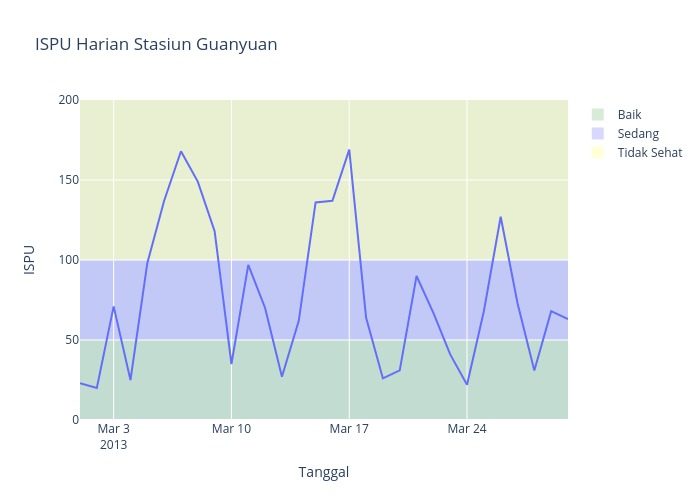

In [23]:
def add_ispu_legend_to_graph(fig: pgo.Figure, max_ispu: float):
  max_y = max_ispu
  ispu_points = [0, 50, 100, 200, 300, 500]
  colors = ['green', 'blue', 'yellow', 'red', 'black']
  names = ['Baik', 'Sedang', 'Tidak Sehat', 'Sangat Tidak Sehat', 'Berbahaya']

  index = 0
  while(max_y > ispu_points[index] and max_y < 500):
    lower_ispu = ispu_points[index]
    upper_ispu = max_y + 50 if lower_ispu >= 300 else ispu_points[index + 1] 
    fig.add_hrect(y0=lower_ispu, y1=upper_ispu, line_width=0, opacity=.15, layer='below',
      name=names[index],
      fillcolor=colors[index],
      showlegend=True,
    )
    index += 1
  pass

# Data 30 Hari pertama digunakan untuk mengurangi penggunaan memori.
daily_guanyuan_bar = px.line(station_names_and_df_daily['Guanyuan'].head(30),
  y='ispu',
  labels={'ispu': 'ISPU', 'datetime': 'Tanggal'},
  title='ISPU Harian Stasiun Guanyuan',
)

add_ispu_legend_to_graph(daily_guanyuan_bar, station_names_and_df_daily['Guanyuan'].head(30)['ispu'].max())
daily_guanyuan_bar.show()

### Sekilas Grafik Semua Stasiun

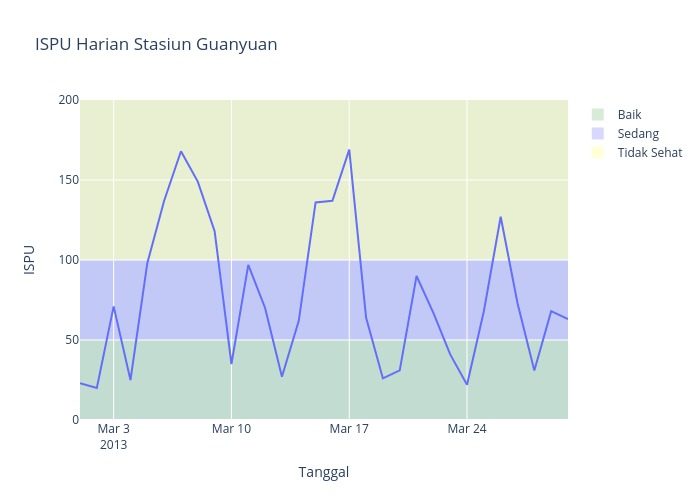

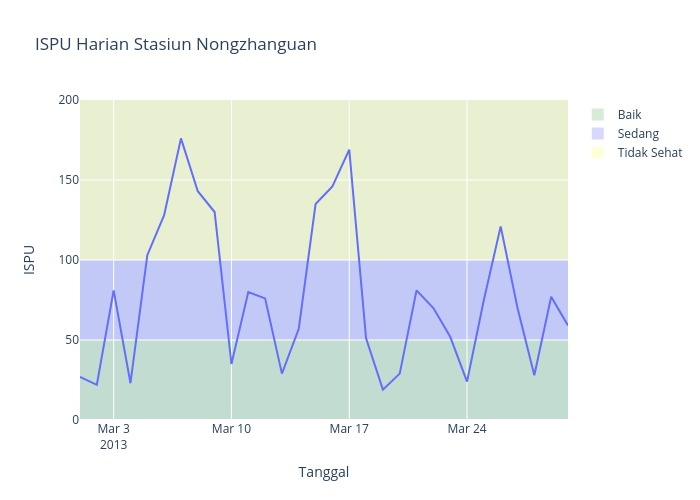

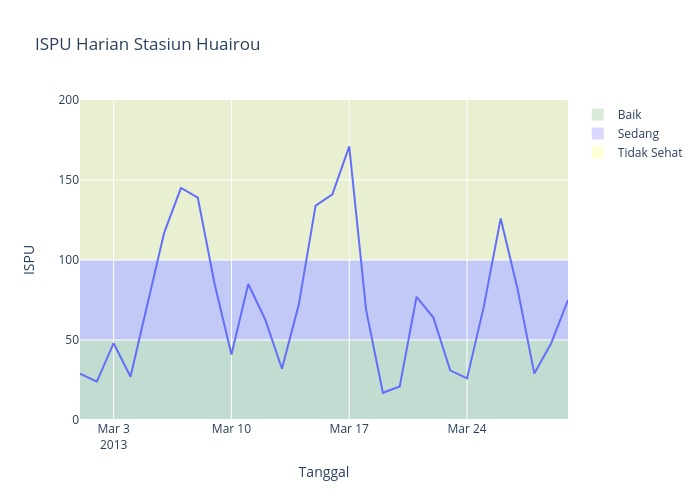

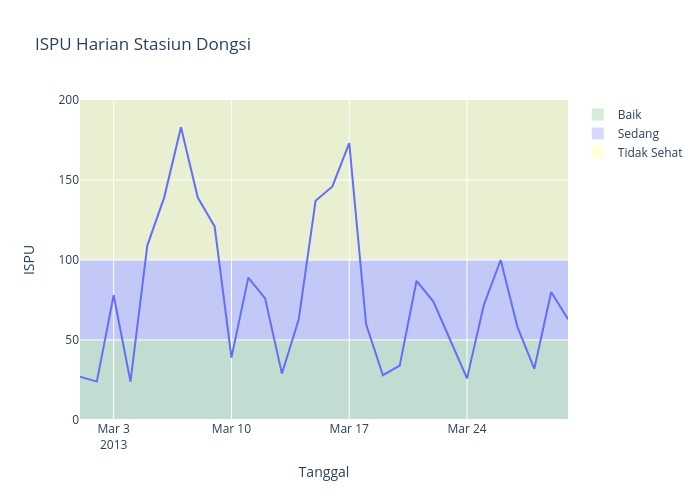

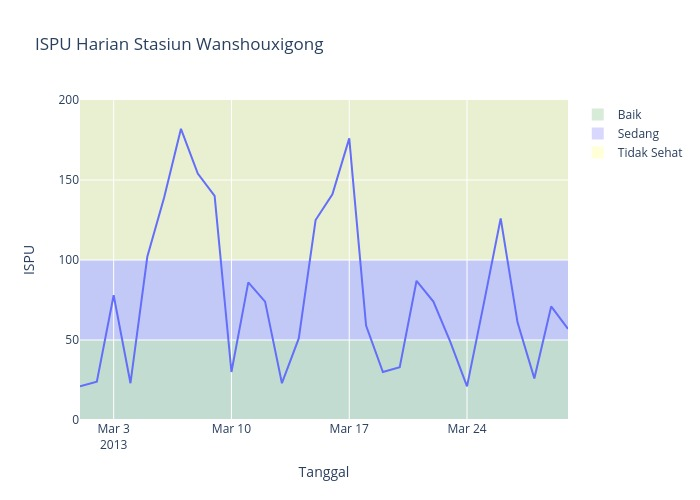

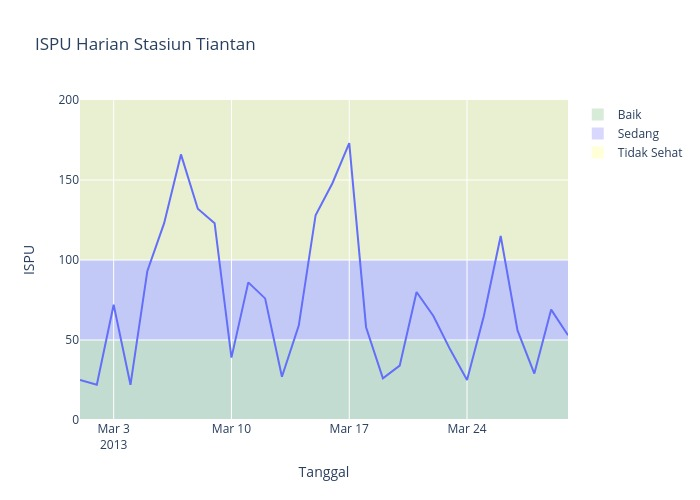

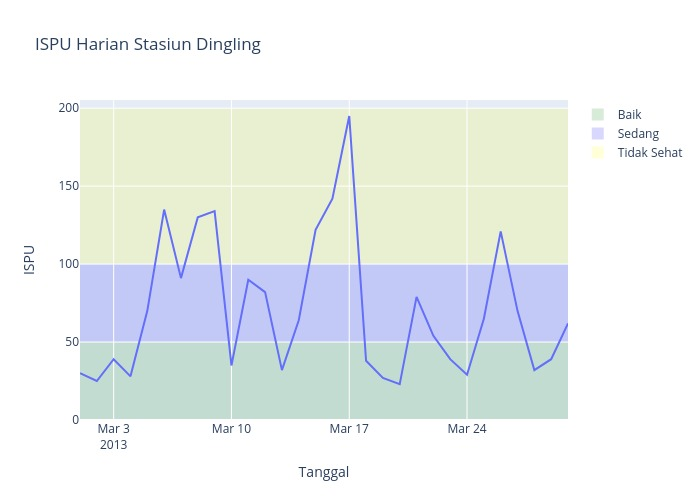

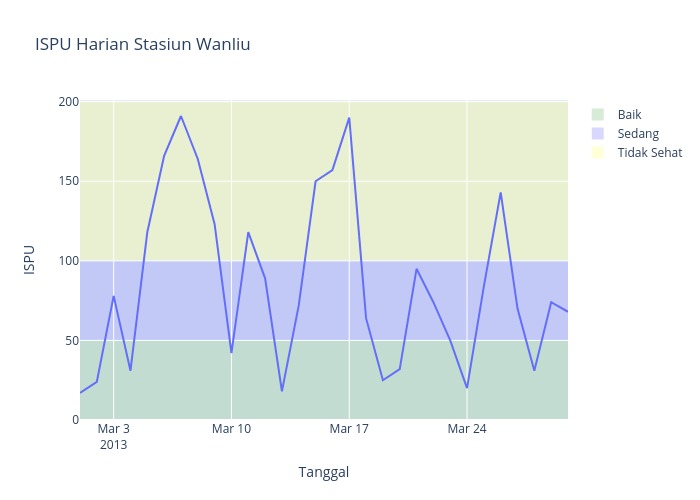

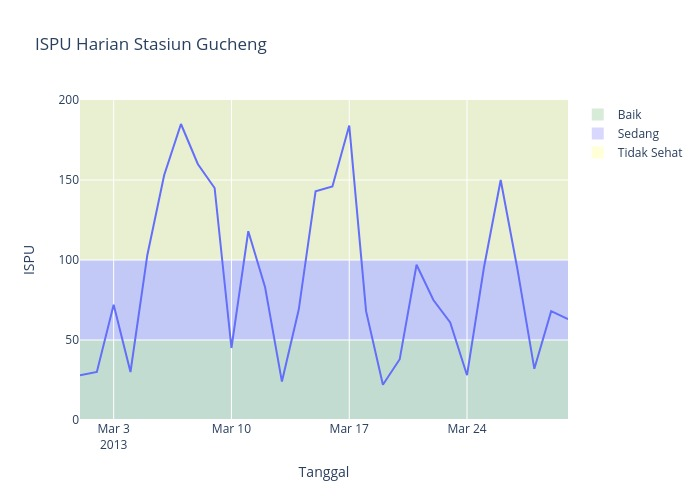

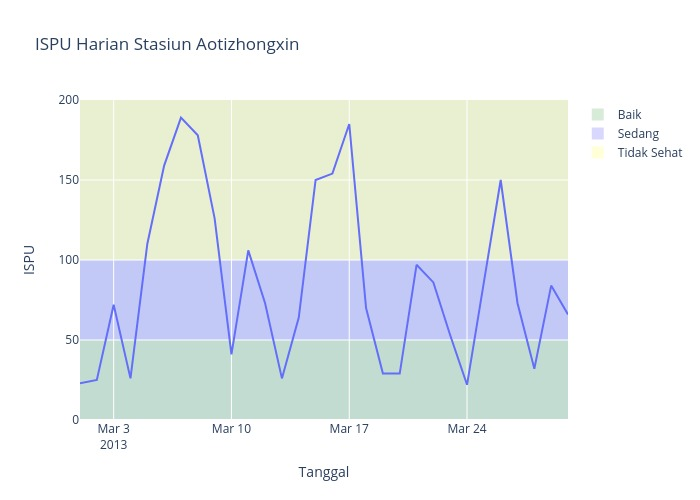

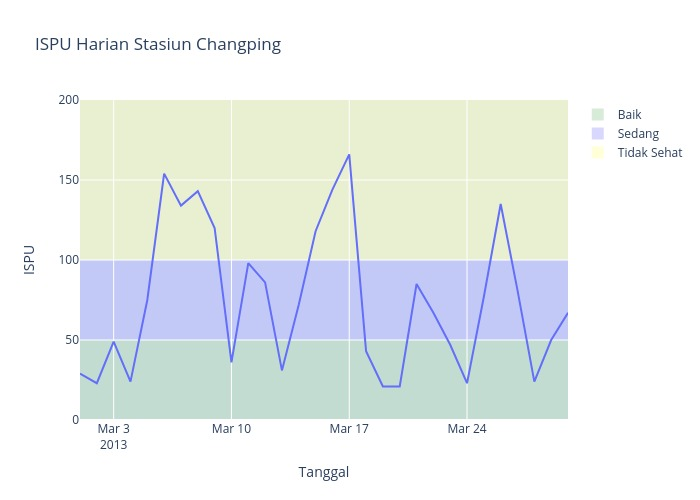

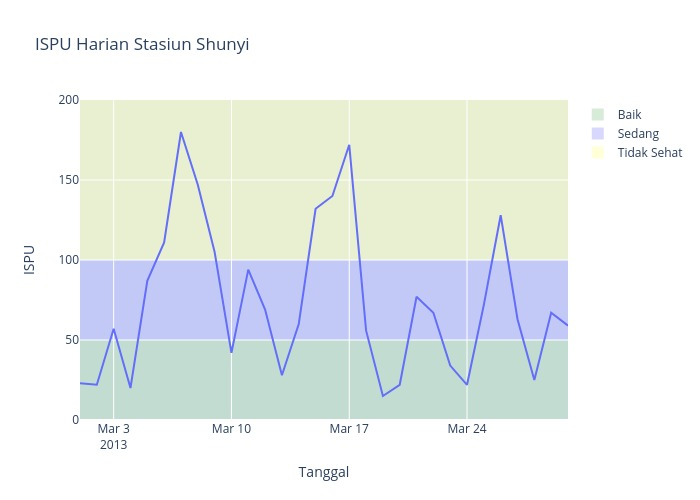

In [24]:
station_names_and_daily_bar = {}
for name in station_names:
  # Data 30 Hari pertama digunakan untuk mengurangi penggunaan memori.
  df = station_names_and_df_daily[name].head(30)
  fig = px.line(df,
    y='ispu',
    labels={'ispu': 'ISPU', 'datetime': 'Tanggal'},
    title=f'ISPU Harian Stasiun {name}'
  )
  add_ispu_legend_to_graph(fig, df['ispu'].max())
  station_names_and_daily_bar[name] = fig
  station_names_and_daily_bar[name].show()

Pada 30 hari pertama, semua stasiun mencapai kualitas udara **Tidak Sehat**. Pada tanggal 7, 16, dan 26 Maret 2013 setiap stasiun memiliki lonjakan ISPU.

## Kualitas Udara Per Bulan dan Musim


### Per Bulan


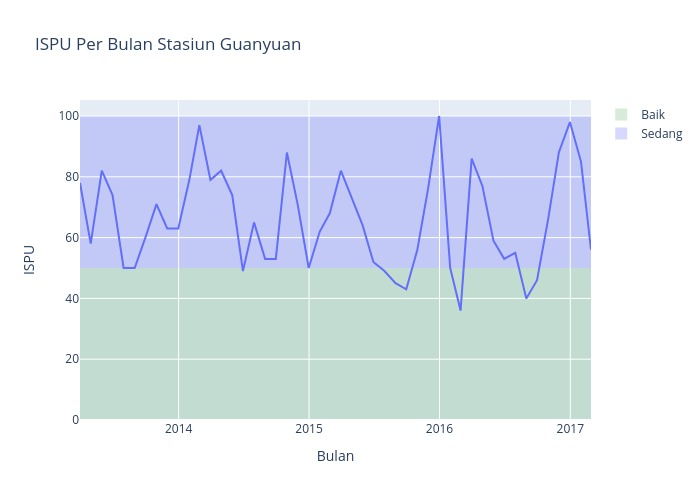

In [25]:
montly_guanyuan_bar = px.line(station_names_and_df_monthly['Guanyuan'],
  y='ispu',
  labels={'ispu': 'ISPU', 'datetime': 'Bulan'},
  title='ISPU Per Bulan Stasiun Guanyuan'
)
add_ispu_legend_to_graph(montly_guanyuan_bar, station_names_and_df_monthly['Guanyuan']['ispu'].max())
montly_guanyuan_bar.show()

#### Grafik Semua Stasiun

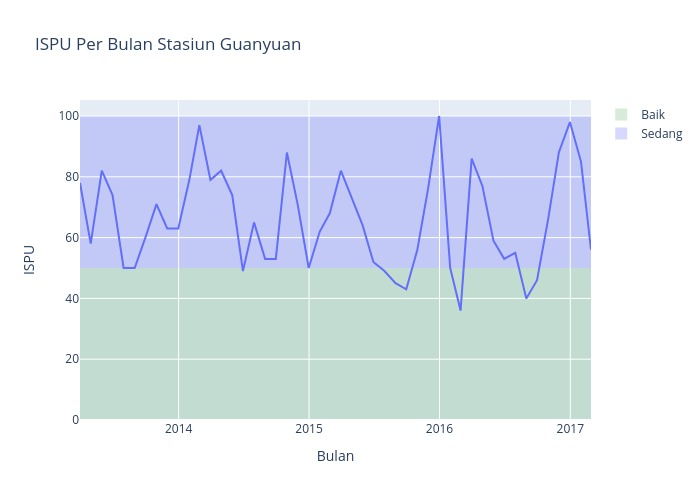

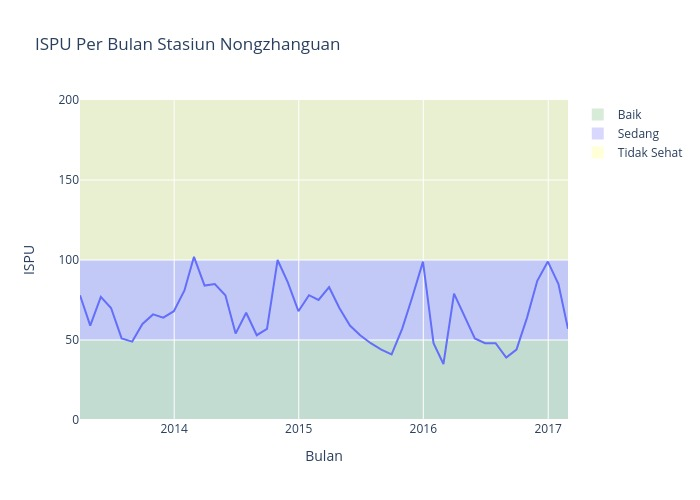

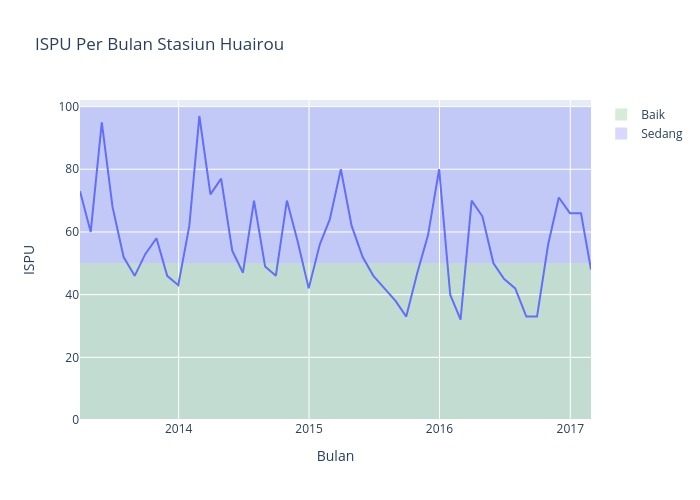

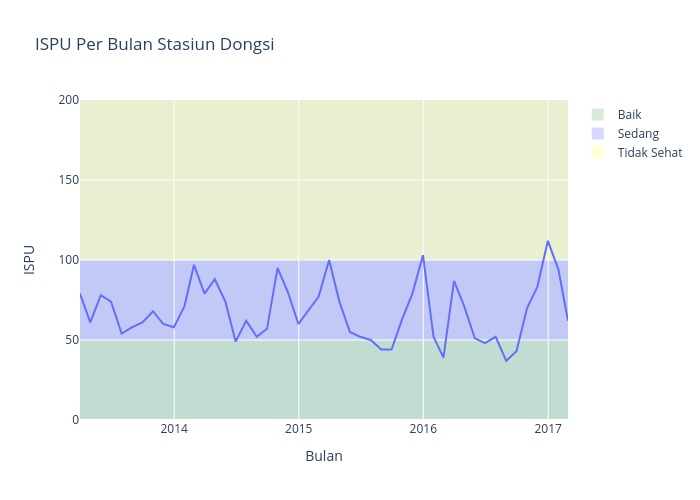

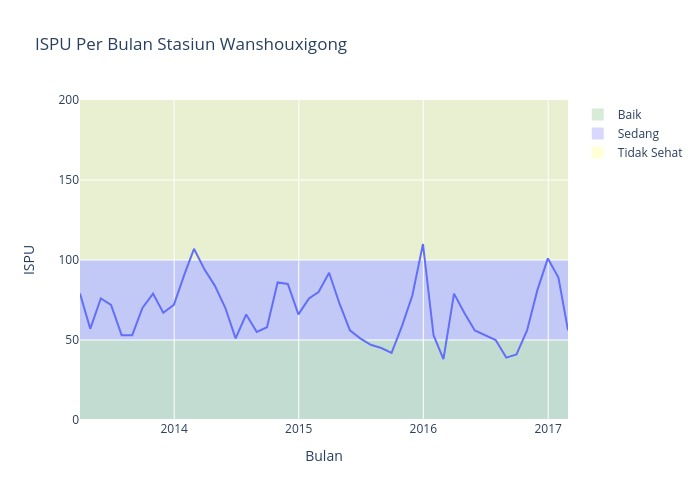

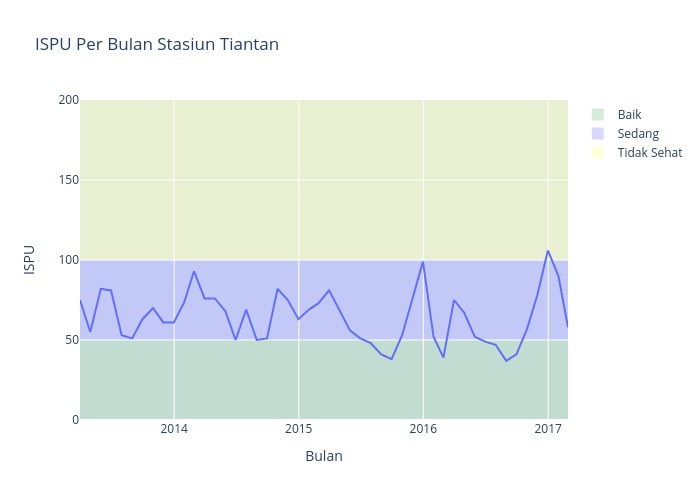

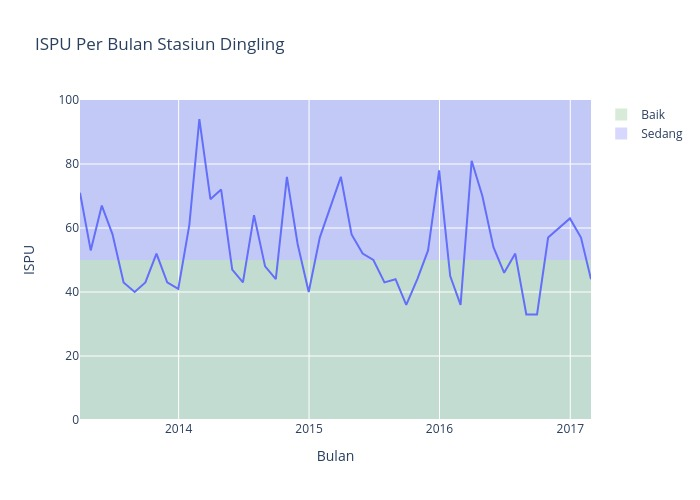

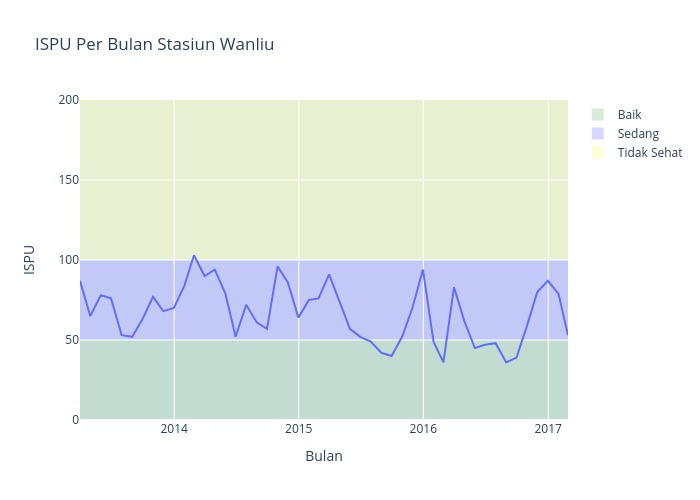

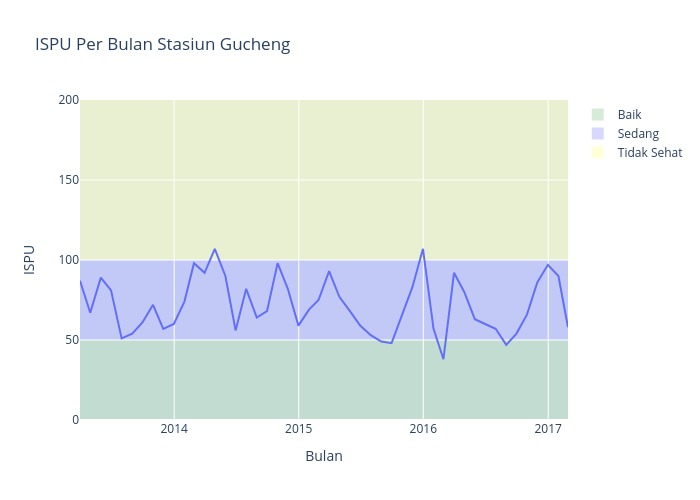

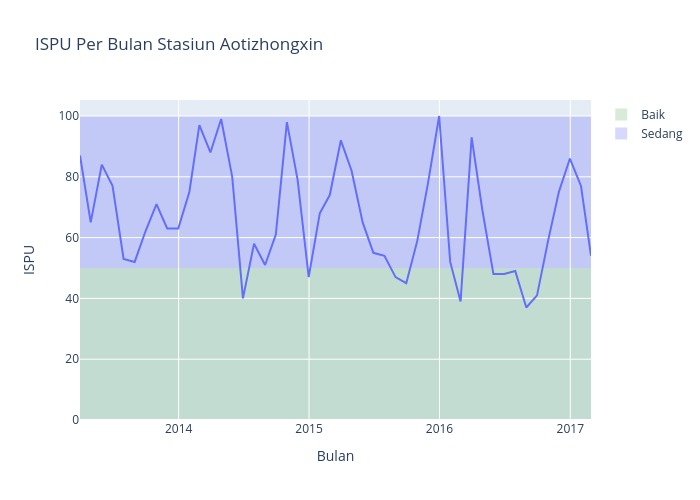

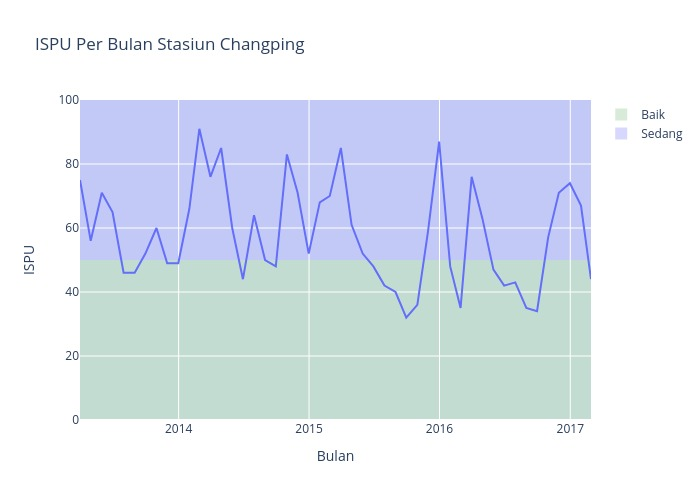

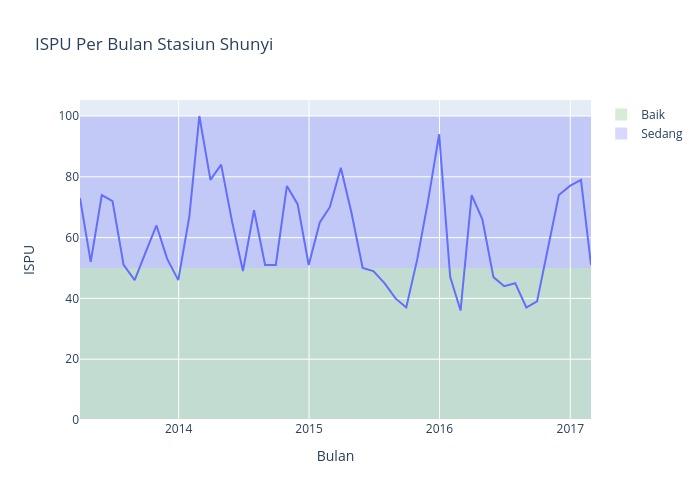

In [26]:
station_names_and_monthly_bar = {}
for name in station_names:
  df = station_names_and_df_monthly[name]
  fig = px.line(df,
    y='ispu',
    labels={'ispu': 'ISPU', 'datetime': 'Bulan'},
    title=f'ISPU Per Bulan Stasiun {name}',
  )
  add_ispu_legend_to_graph(fig, df['ispu'].max())
  station_names_and_monthly_bar[name] = fig
  station_names_and_monthly_bar[name].show()
  

## Per Musim

### Grafik Semua Stasiun

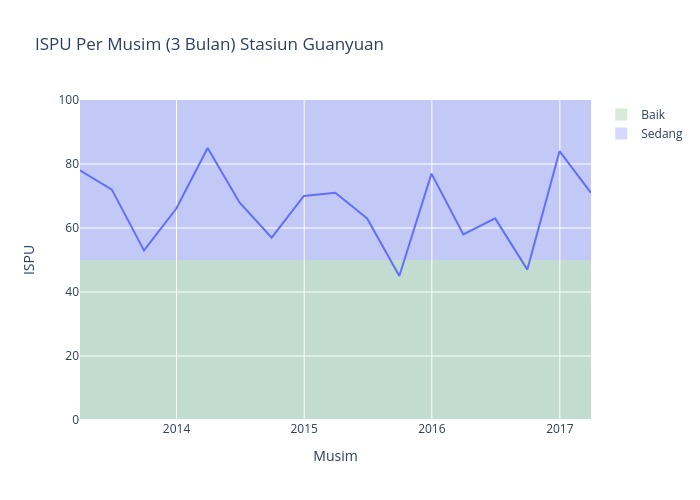

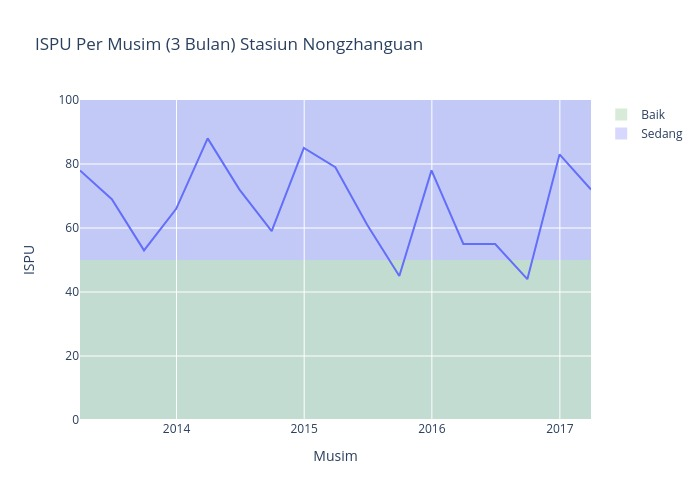

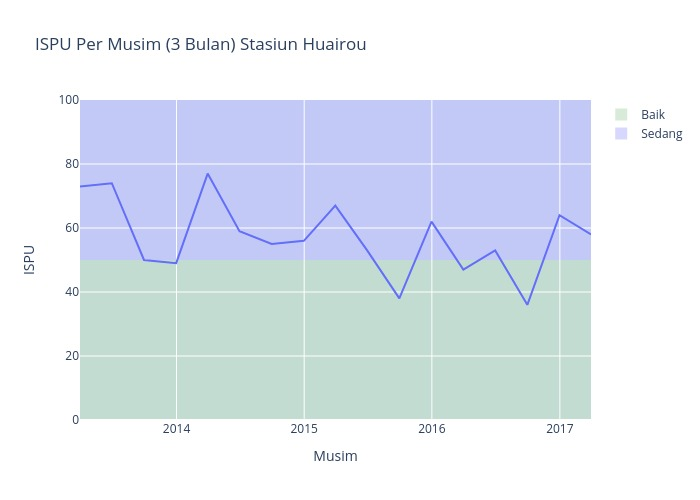

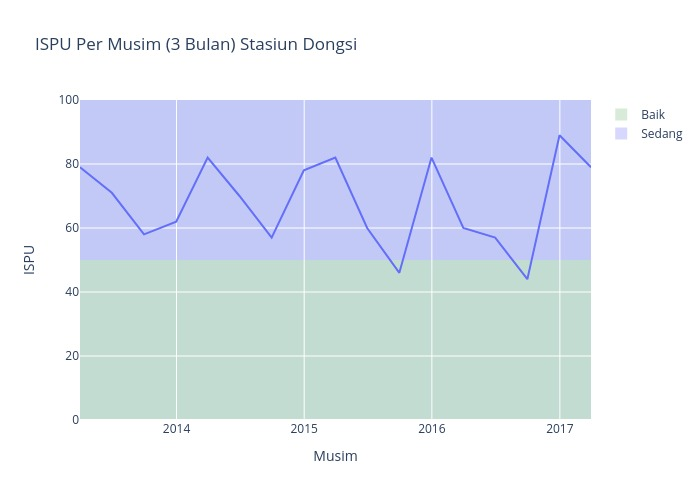

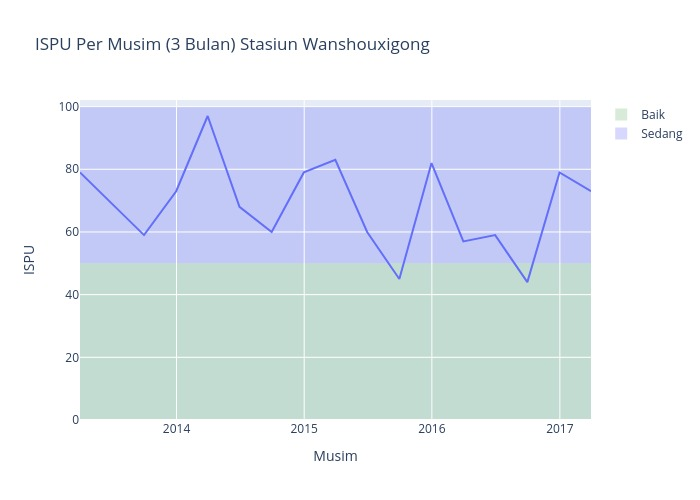

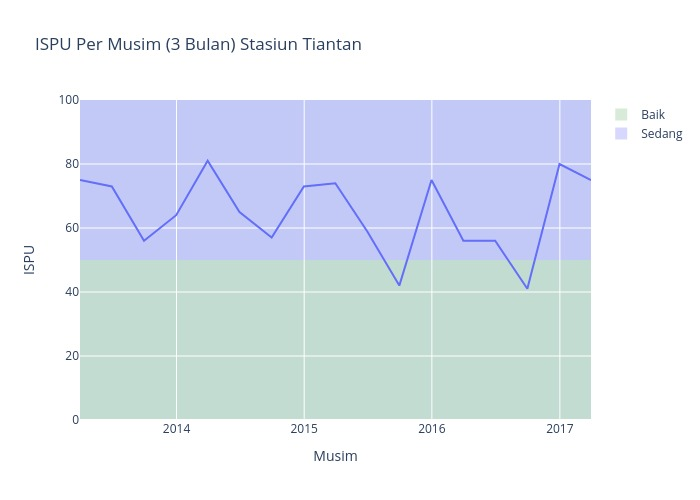

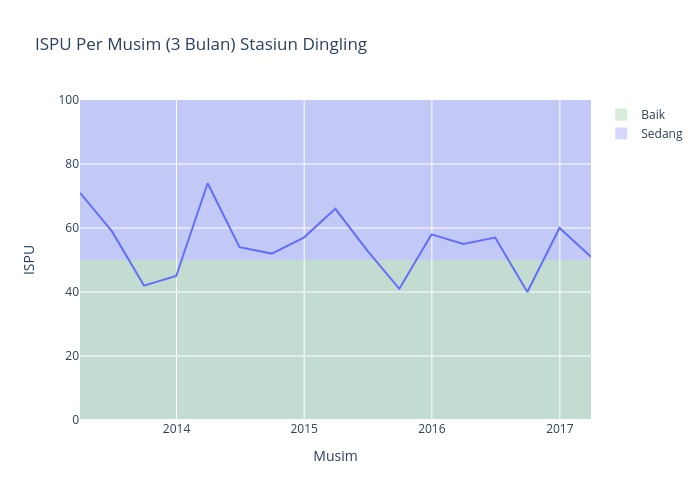

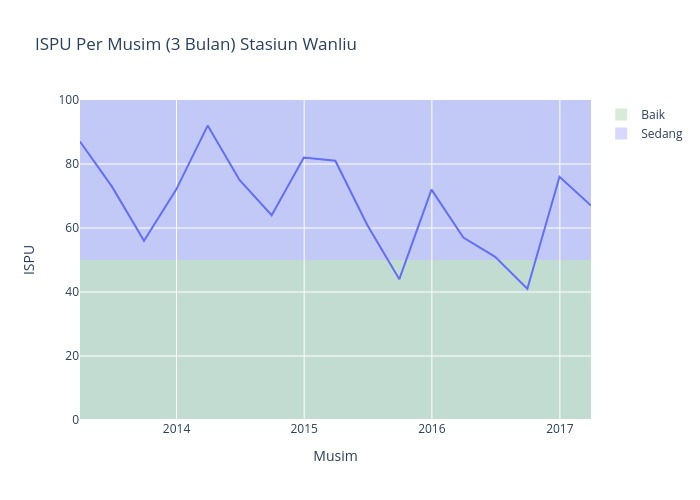

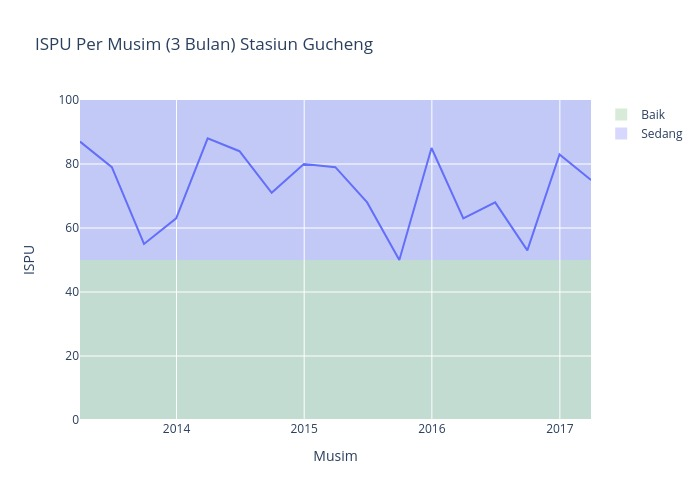

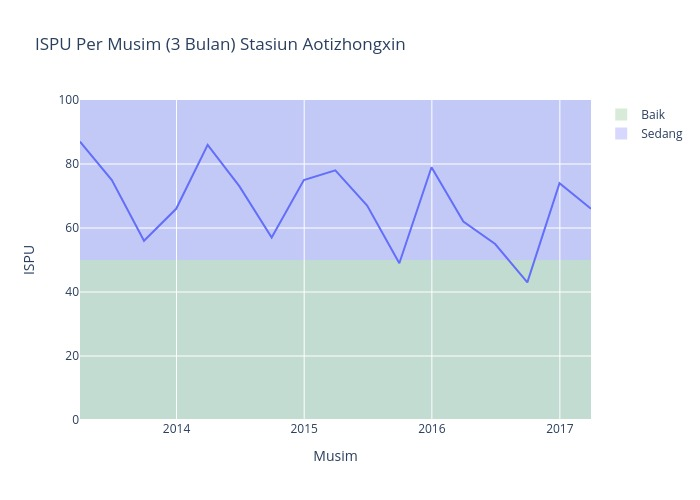

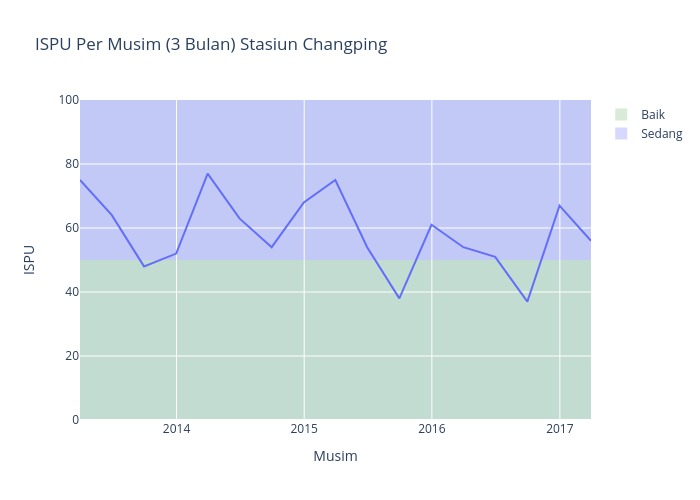

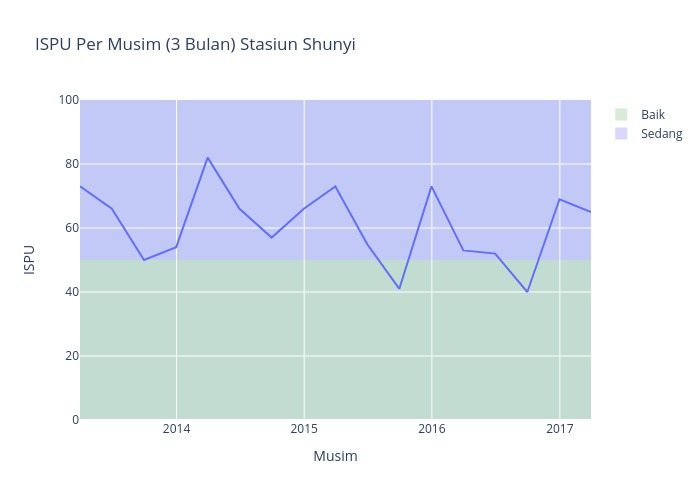

In [27]:
station_names_and_quarterly_graph = {}
for name in station_names:
  df = station_names_and_df_quarterly[name]
  fig = px.line(df,
    y='ispu',
    labels={'ispu': 'ISPU', 'datetime': 'Musim'},
    title=f'ISPU Per Musim (3 Bulan) Stasiun {name}'
  )
  add_ispu_legend_to_graph(fig, df['ispu'].max())
  station_names_and_quarterly_graph[name] = fig
  station_names_and_quarterly_graph[name].show()

Secara umum, musim semi atau bulan Maret pada tahun 2013 sampai 2015 terjadi kenaikan ISPU. Sedangkan pada tahun 2016 dan 2017, awal tahunlah yang memiliki kualitas terburuk.

## Korelasi Hujan dan Kualitas Udara
### Grafik Semua Stasiun

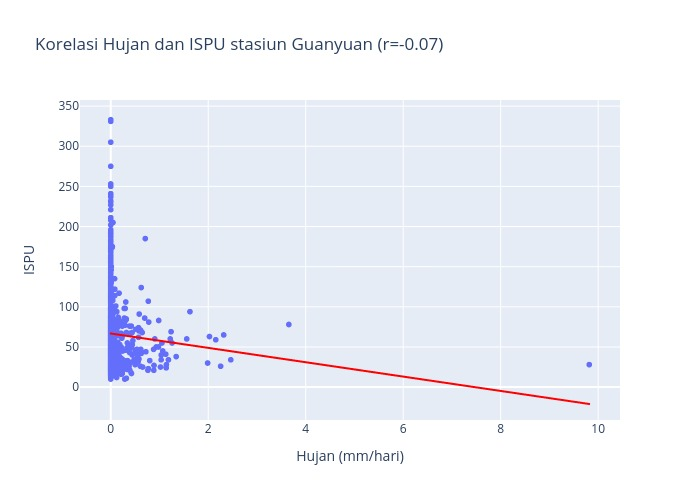

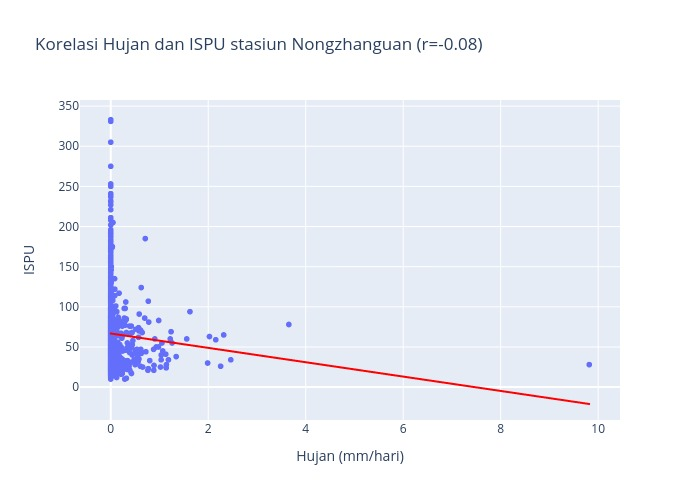

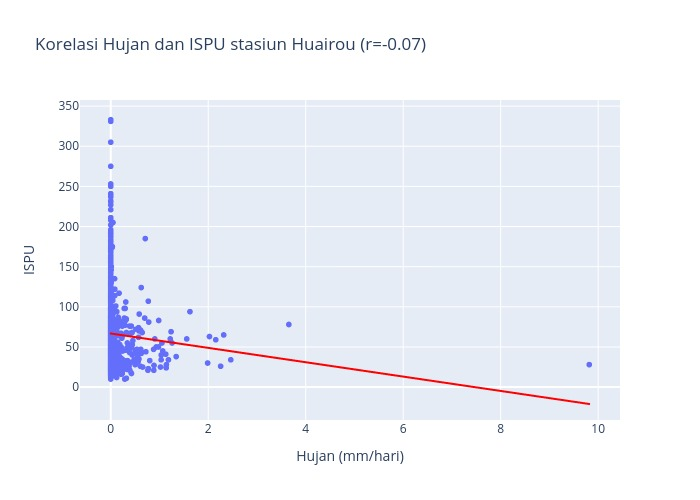

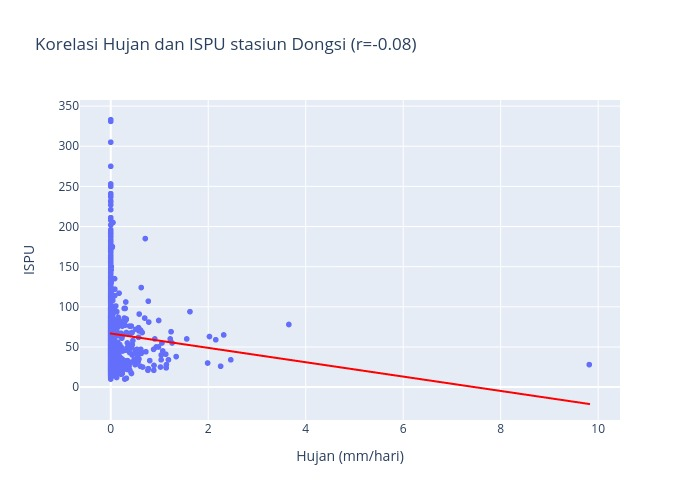

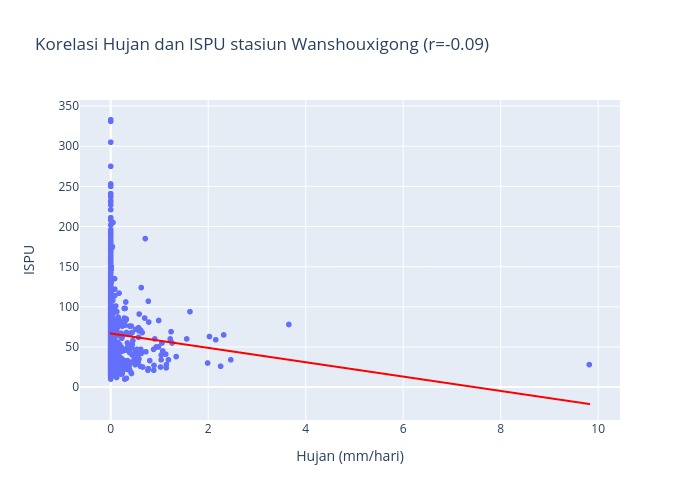

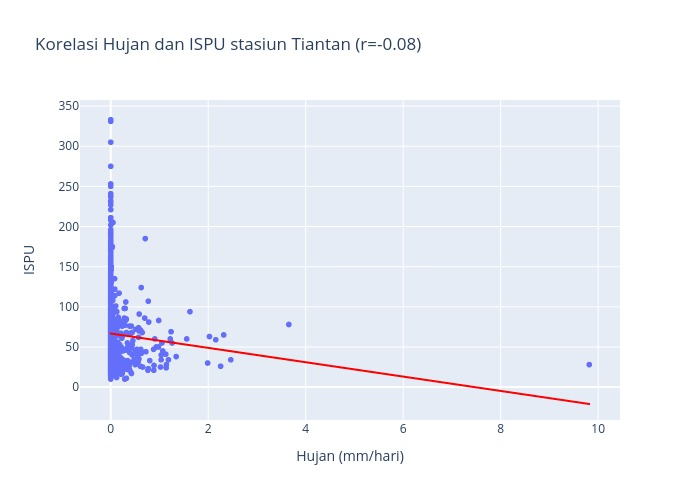

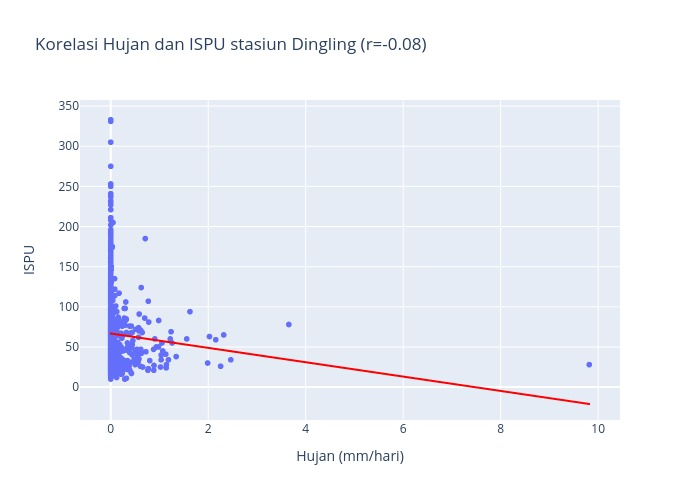

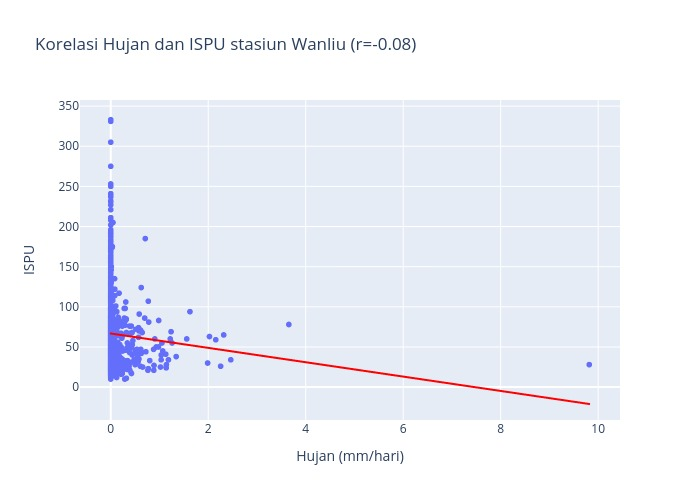

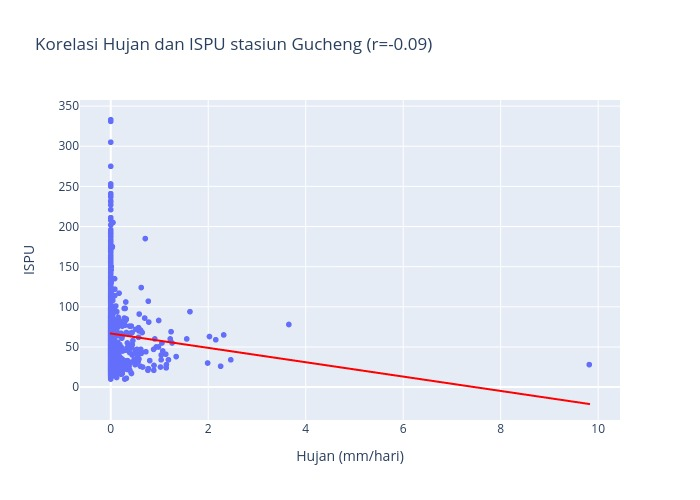

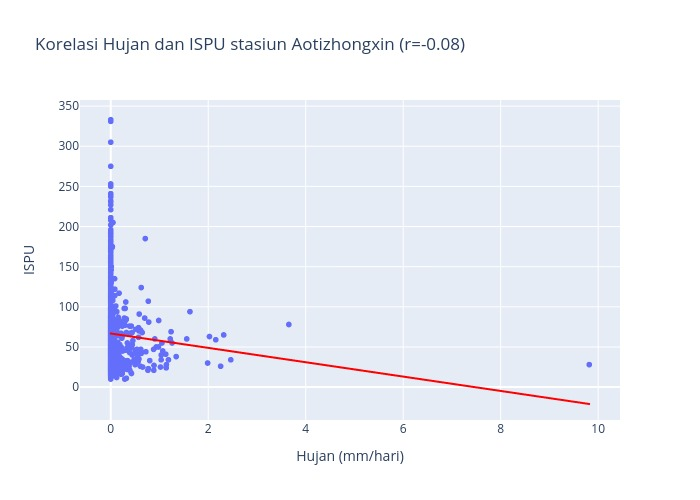

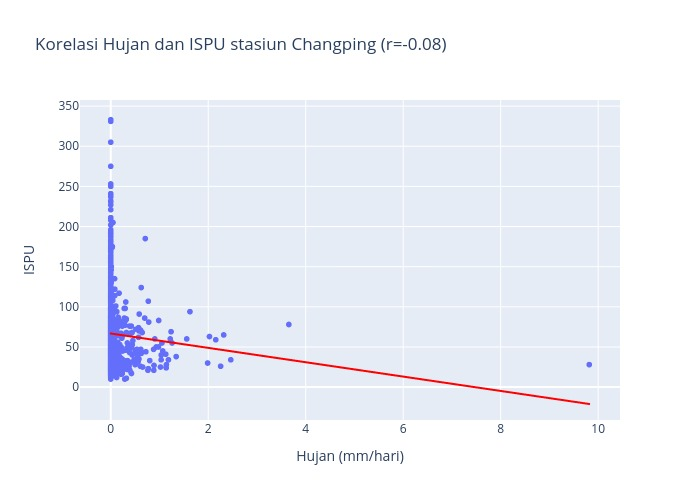

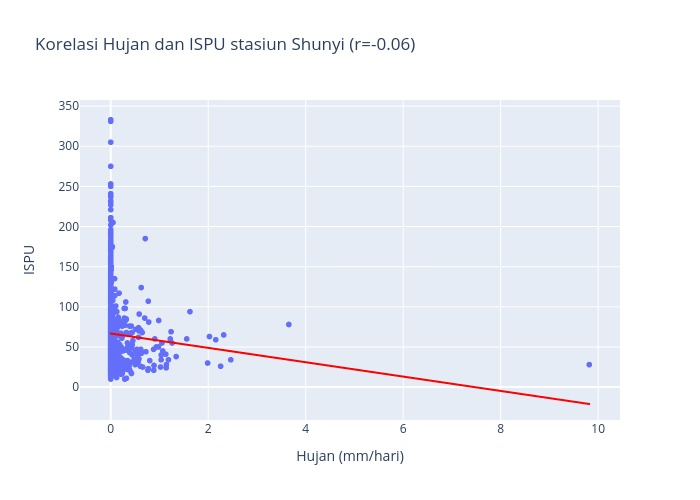

In [28]:
# station_names_and_rain_scatter = {}
for name in station_names:
  df = station_names_and_df_daily[name]
  r_number = station_names_and_df_daily[name]\
    .drop(['ispu_category', 'station'], axis=1)\
      .corr()['RAIN']['ispu']
  fig = px.scatter(
    station_names_and_df_daily['Guanyuan'],
    title=f'Korelasi Hujan dan ISPU stasiun {name} (r={round(r_number, 2)})',
    x='RAIN', y='ispu',
    labels={'ispu': 'ISPU', 'RAIN': 'Hujan (mm/hari)'},
    trendline_color_override='red',
    trendline="ols",  
  ).show()


Hujan memiliki korelasi negatif yang **sangat lemah** terhadap ISPU. Meskipun memiliki kemungkinan yang sangat sedikit untuk mengurangi polutan, hasil dari setiap stasiun memiliki korelasi negatif yang konsisten.

## Perbandingan Kualitas Udara tiap Stasiun

In [29]:
all_stations_ispu_list = []
for name in station_names:
  current_df : pd.DataFrame = station_names_and_df_daily[name]
  current_df_only_ispu  = current_df[['ispu']]
  current_df_renamed = current_df_only_ispu.rename({'ispu': name}, axis=1)
  all_stations_ispu_list.append(current_df_renamed)
  # all_stations_ispu = current_df_renamed if all_stations_ispu == None else pd.concat([all_stations_ispu, current_df_renamed], axis=1)
  # all_stations_ispu = current_df_renamed

all_stations_ispu = pd.concat(all_stations_ispu_list, axis=1)

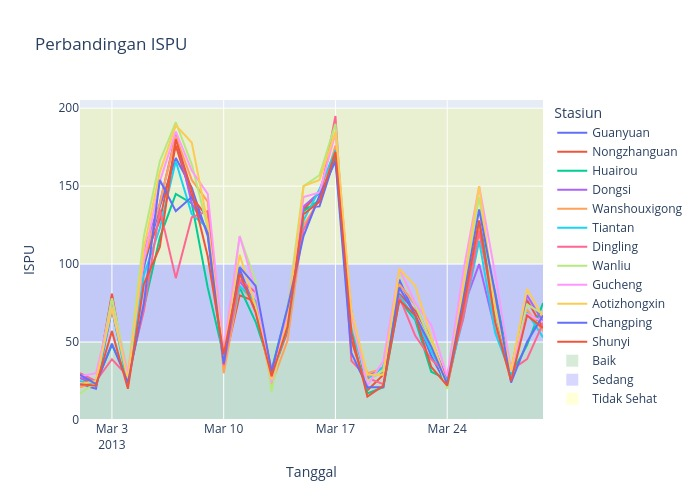

In [30]:
all_stastions_ispu_line = px.line(all_stations_ispu.head(30),
  labels={'datetime': 'Tanggal', 'value': 'ISPU', 'variable': 'Stasiun'},
  title='Perbandingan ISPU'
)
add_ispu_legend_to_graph(all_stastions_ispu_line, all_stations_ispu.head(30).max().max())
all_stastions_ispu_line.show()

Dari 30 hari pertama, semua stasiun memiliki pola naik dan turunnya nilai ISPU yang sama. Suatu kelainan khusus pada tanggal 7 Maret 2013, yang mana hanya stasiun Dingling mempunyai kategori kualitas udara sedang.

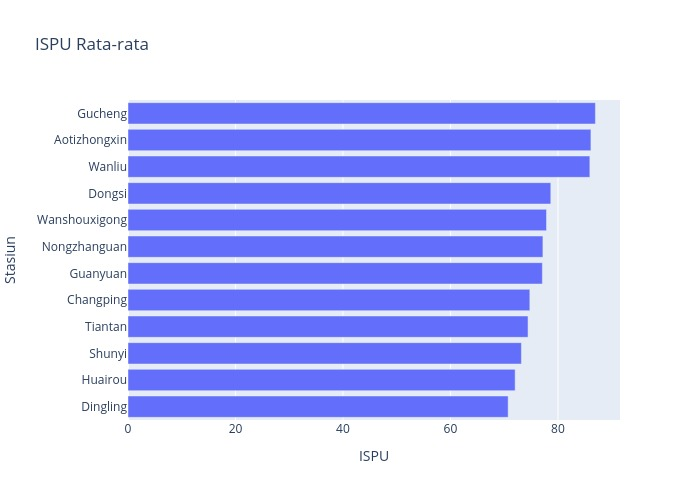

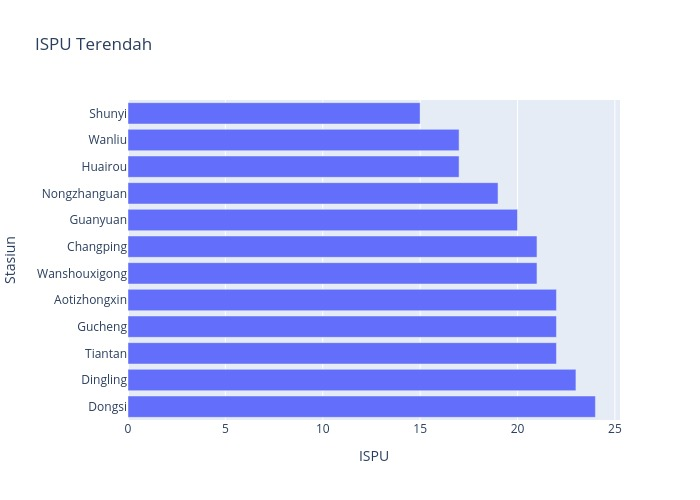

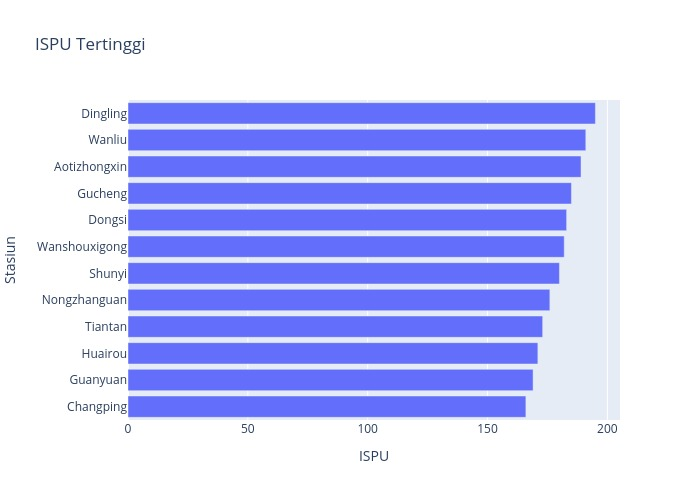

In [31]:
all_stations_ispu_avg_bar = px.bar(all_stations_ispu.head(30).mean().sort_values(),
  orientation='h',
  labels={'index': 'Stasiun', 'value': 'ISPU'},
  title='ISPU Rata-rata'
)
all_stations_ispu_avg_bar.update_layout(showlegend=False)
all_stations_ispu_avg_bar.show()

all_stations_ispu_min_bar = px.bar(all_stations_ispu.head(30).min().sort_values(ascending=False),
  orientation='h',
  labels={'index': 'Stasiun', 'value': 'ISPU'},
  title='ISPU Terendah'
)
all_stations_ispu_min_bar.update_layout(showlegend=False)
all_stations_ispu_min_bar.show()

all_stations_ispu_max_bar = px.bar(all_stations_ispu.head(30).max().sort_values(),
  orientation='h',
  labels={'index': 'Stasiun', 'value': 'ISPU'},
  title='ISPU Tertinggi'
)
all_stations_ispu_max_bar.update_layout(showlegend=False)
all_stations_ispu_max_bar.show()

Dari nilai rata rata, Gucheng memiliki ISPU yang paling tinggi, sedangkan Dingling paling rendah. Shunyi memiliki hari dengan ISPU terendah bernilai 15, dan Dingling terdapat hari dengan kualitas udara terburuk dengan ISPU 195

# Data Export

In [32]:
# Export untuk data harian dan korelasi hujan
all_station_df_daily_export = all_stations_df_daily[['RAIN', 'ispu', 'station']]
all_station_df_daily_export.to_csv('dashboard/data/all_station_df_daily.csv')

In [33]:
# Export untuk data per bulan dan musim
all_station_df_monthly = pd.concat([df.assign(station=station) for station, df in station_names_and_df_monthly.items()])
all_station_df_monthly = all_station_df_monthly[['ispu', 'station']]
all_station_df_monthly.sample(5)
all_station_df_monthly.to_csv('dashboard/data/all_station_df_monthly.csv')

all_station_df_quarterly = pd.concat([df.assign(station=station) for station, df in station_names_and_df_quarterly.items()])
all_station_df_quarterly = all_station_df_quarterly[['ispu', 'station']]
all_station_df_quarterly.sample(5)
all_station_df_quarterly.to_csv('dashboard/data/all_station_df_quarterly.csv')

In [34]:
# Export untuk perbandingan semua stasiun
all_stations_ispu.to_csv('dashboard/data/all_stations_ispu.csv')